# Выпускной проект: Телеком

**Описание и цель проекта:**  

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.   
Задача исследования — обучить на предоставленных Заказчиком данных модель для прогноза оттока клиентов.

**Описание услуг:**  

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение бывает двух типов: через телефонную линию DSL (англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (англ. fiber optic).  

Также абонентам доступен ряд услуг:
- Интернет-безопасность: антивирус (Device Protection) и блокировка опасных сайтов (Online Security);
- Выделенная линия технической поддержки (Tech Support);
- Облачное хранилище файлов для резервного копирования данных (Online Backup);
- Стриминговое телевидение (Streaming TV) и каталог фильмов (Streaming Movies).  
За услуги клиенты могут платить ежемесячно или раз в 1–2 года. Доступны различные способы расчёта и возможность получить электронный чек.

**Описание данных:**
    
***Данные хранятся в Sqlite  — СУБД, в которой база данных представлена одним файлом. Она состоит из нескольких таблиц:***
    
- contract — информация о договорах;
- personal — персональные данные клиентов;
- internet — информация об интернет-услугах;
- phone — информация об услугах телефонии.


***Таблица contract***

- customerID — ID абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

***Таблица personal***

- customerID — ID пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

***Таблица internet***

- customerID — ID пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

***Таблица phone***

- customerID — ID пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

**План работы:**
1.  [Загрузка данных:](#section_id)

а)Подключиться к базе данных в Sqlite.   

б)Задать константу RANDOM_STATE, значением равным дате начала работы над проектом. Например, если это 1 сентября 2022 года, то RANDOM_STATE = 10922.

2. [Исследовательский анализ и предобработка данных:](#section_id2)
 
а) Проанализировать исходные данные.

Проверить:
- все ли таблицы содержат данные.
- соответствует ли количество таблиц условию задачи.

б) Для каждой таблицы:
  
- провести исследовательский анализ данных: проверить наличие пропусков и аномалий, изучить распределение признаков.
- обработать аномалии с учётом особенностей услуг телекоммуникации.

в) Объединить таблицы по ID клиента:
  
- каждому клиенту должно соответствовать одно наблюдение. При объединении учитывать особенности услуг телекоммуникации.
- попробовать сгенерировать новые признаки, которые могут пригодиться при обучении. Например, рассчитать длительность контракта абонента.
- выделить в целевую переменную признак EndDate.
- провести исследовательский анализ данных объединённой таблицы, при необходимости заполнить пропуски и визуализировать распределение каждого признака.
- визуализировать соотношение ушедших и оставшихся клиентов для каждого признака.
- провести корреляционный анализ.

г) Подготовить данные для обучения:
  
- выбрать признаки, которые будут использованы для обучения, учесть особенности данных и выбранных моделей. Исследование не является задачей временных рядов, поэтому не стоит использовать даты как входные признаки модели.
- в случае генерации нового признака «Длительность контракта абонента», не использовать его одновременно с любыми другими производными признака BeginDate — например с годом заключения договора. Это приведёт к утечке целевого признака.
- разделите данные на тренировочную и тестовую выборки (test_size = 0.25).
- подготовить выборки для обучения, учитывать особенности выбранных моделей.

3. [Обучение модели](#section_id3)

а) Рассмотреть классы моделей:  
- решающее дерево или случайный лес,
- бустинги,
- нейронные сети.

б) Найти лучшую модель для прогноза оттока клиентов. Оценить её качество метрикой ROC-AUC. Выбрать лучшую модель по значению метрики на кросс-валидации.

в) Подобрать значения как минимум двум гиперпараметрам хотя бы для одной модели. Лучше всего использовать методы автоматизированного подбора гиперпараметров: GridSearchCV, RandomizedSearchCV, OptunaSearchCV, Optuna и другие.

4. [Тестирование модели](#section_id4)

а) Проверить качество лучшей модели на тестовой выборке. Значение метрики ROC-AUC должно быть не менее 0.85. Для интерпретируемости модели дополнительно вывести значение accuracy.  
б) Построить матрицу ошибок лучшей модели. Отобразить полноту и точность модели на графике.  
в) Проанализировать важность основных входных признаков, влияющих на отток клиентов.  
г) Для одного из важных входных признаков провести дополнительное исследование:
- показать график зависимости входного и целевого признаков.
5. [Общий вывод](#section_id5)
- Написать общие выводы, предложить способы для дальнейшего улучшения модели и дать бизнес-рекомендации заказчику.

Загружаем необходимые для выполнения исследований библиотеки:

In [9]:
pip install -q seaborn==0.13.0

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
from sqlalchemy import create_engine
from IPython.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import phik_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
f1_score, precision_score, recall_score, 
roc_auc_score, roc_curve, accuracy_score, confusion_matrix, 
mean_squared_error, precision_recall_curve, ConfusionMatrixDisplay
)
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import shap
import warnings
warnings.filterwarnings('ignore')

Определим необходимые константы:

In [12]:
RANDOM_STATE = 170225
TEST_SIZE = 0.25

## Загрузка данных
<a id='section_id'></a>

Выполним подключение к базе данных с иходными данными Заказчика:

In [16]:
try:
    path_to_db = '/home/pc-mint/Загрузки/Final_project/ds-plus-final.db'

except:
    !wget https://code.s3.yandex.net/data-scientist/ds-plus-final.db 
    path_to_db = 'ds-plus-final.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo=False) 

Проверим что подключение к БД выполнено, сделаем запрос к таблице contract и выведем первые ее 5 строк:

In [18]:
query_test = '''
SELECT *
FROM contract
LIMIT 5
'''

In [19]:
test_query = pd.read_sql_query(query_test, con = engine)

In [20]:
test_query

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7,353.5


Подключение к БД выполнено корректно

**Вывод:**   
В рамках данного раздела:
- выполнено подключение к базе данных с исходными данными Заказчика
- выполнен тестовый запрос на подключение и вывод необходимой информации
<a id='section_id2'></a>

##  Исследовательский анализ и предобработка данных

Проведем исследовательский анализ для каждой таблицы базы данных:

Напишем функцию которая сформирует необходимый запрос к соответствующей таблице БД:

In [27]:
def create_pd(name):
    query_name = f'SELECT * FROM {name}'
    df_name = pd.read_sql_query(query_name, con=engine)
    print (df_name.head())
    print()
    print (df_name.info())
    print()
    print (df_name.describe().T)
    print()
    print ('Пропусков в датасете:\n', df_name.isna().sum())
    print()
    print ('Явных дубликатов:', df_name.duplicated().sum())
 
    return df_name

Загрузим датасет содержащий таблицу **contract**

In [29]:
df_contract = create_pd('contract')

   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  
0           Electronic check          29.85        31.04  
1               Mailed check          56.95      2071.84  
2               Mailed check          53.85       226.17  
3  Bank transfer (automatic)           42.3       1960.6  
4           Electronic check           70.7        353.5  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        704

Как видно из таблицы выше, датасет содержит 7043 значений, не имеет пропусков и явных дубликатов, однако содержит некорректные типы данных в столбцах 'MonthlyCharges' и  'TotalCharges' - значения выражены строками, необходимо перевести их в числа с плавающей точкой. Также строками выражены значений дат в столбцах 'BeginDate', 'EndDate', переведем их в формат дат, для удобства их обработки

В процессе попытки перевода столбца 'TotalCharges' в формат float выяснилось что в столбце содержатся скрытые пропуски - знаки пробела ' '. Выведем строки содержащие данные значения:

In [33]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.0,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.7,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Как видно из таблицы выше, контракты по которым в столбце 'TotalCharges' стоят пробелы, заключены 01-02-2020, т.е. в день "среза" базы данных. Соответственно данные объекты не несут никакой обучающей информации для наших моделей и могут быть удалены

In [35]:
df_contract = df_contract[df_contract['TotalCharges'] != ' ']

Вернемся к вопросу перевода значений столбцов 'MonthlyCharges' и  'TotalCharges' в числа с плавающей точкой:

In [38]:
df_contract[['MonthlyCharges', 'TotalCharges']] = (
    df_contract[['MonthlyCharges', 'TotalCharges']].astype('float')
)

In [39]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


Также переведем значения столбцов 'BeginDate', 'EndDate' в формат даты:

In [41]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')

Для столбца 'EndDate' также заменим значение 'No' на дату '2020-02-01' при условии что такая дата в датасете отсутствует:

In [43]:
df_contract[df_contract['EndDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [44]:
df_contract['EndDate'] = (
    pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d', errors='coerce').fillna(pd.to_datetime('2020-02-01'))
)

Проверим корректность перевода типов данных:

In [46]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 494.4+ KB


Типы данных преобразованы корректно. 

Проведем **исследовательский анализ датасета df_contract**:

Для исследования распределения количественных данных воспользуемся функцией

In [51]:
def num_stat_and_graph(df, col, n, title):
    stat = df[col].describe()
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    sns.histplot(df[col], bins=n, ax=axes[0])
    sns.boxplot(data=df, x=col)
    fig.suptitle(title);
    return stat

Для исследования распределения категориальных данных воспользуемся функцией

In [53]:
def count_graph(df, col, name):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.countplot(y=df[col],
         order=df[col].value_counts(ascending=False).index);
    abs_values = df[col].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    ax.set_title(name);

Посмотрим на распределение признака 'BeginDate':

count                             7032
mean     2017-04-28 23:14:44.641638400
min                2013-10-01 00:00:00
25%                2015-06-01 00:00:00
50%                2017-09-01 00:00:00
75%                2019-04-01 00:00:00
max                2020-01-01 00:00:00
Name: BeginDate, dtype: object

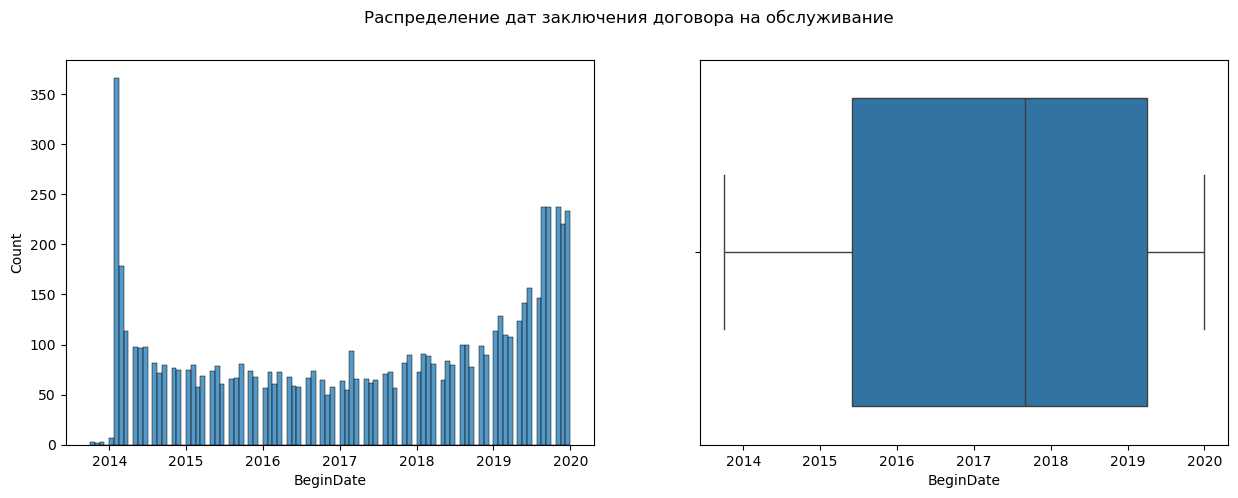

In [55]:
num_stat_and_graph(df_contract, 'BeginDate', 100, 'Распределение дат заключения договора на обслуживание')

Как видно из графика выше, больше всего контрактов было заключено в начале 2014 и конце 2019 года

Посмотрим на распределение признака 'EndDate':

count                             7032
mean     2019-10-15 22:19:02.662116096
min                2014-06-01 00:00:00
25%                2020-02-01 00:00:00
50%                2020-02-01 00:00:00
75%                2020-02-01 00:00:00
max                2020-02-01 00:00:00
Name: EndDate, dtype: object

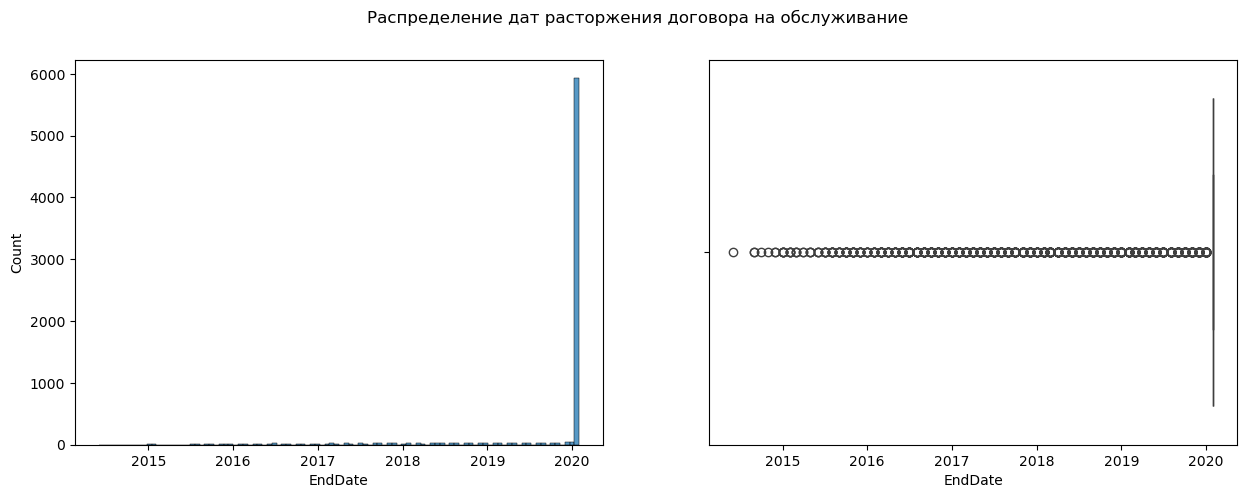

In [59]:
num_stat_and_graph(df_contract, 'EndDate', 100, 'Распределение дат расторжения договора на обслуживание')

Данный график нам мешает анализировать значение '2020-02-01' присвоенное нами,действующим Договорам

count                             1101
mean     2018-03-12 18:21:15.204359680
min                2014-06-01 00:00:00
25%                2017-05-01 00:00:00
50%                2018-06-01 00:00:00
75%                2019-04-01 00:00:00
max                2020-01-01 00:00:00
Name: EndDate, dtype: object

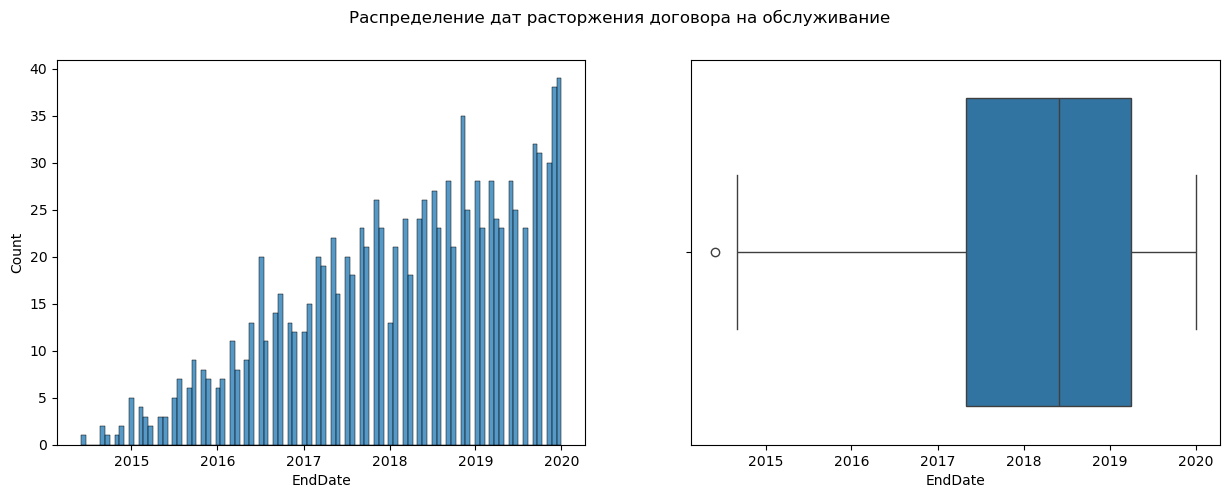

In [61]:
num_stat_and_graph(
    df_contract[df_contract['EndDate'] != '2020-02-01'], 'EndDate', 100, 
    'Распределение дат расторжения договора на обслуживание'
)

График распределения количества растогрнутых договоров на обслуживание является линейно растущим, что в целом логично, т.к. с каждом годом действующих Договоров накапливается.

Посмотрим на распределение признака 'Type':

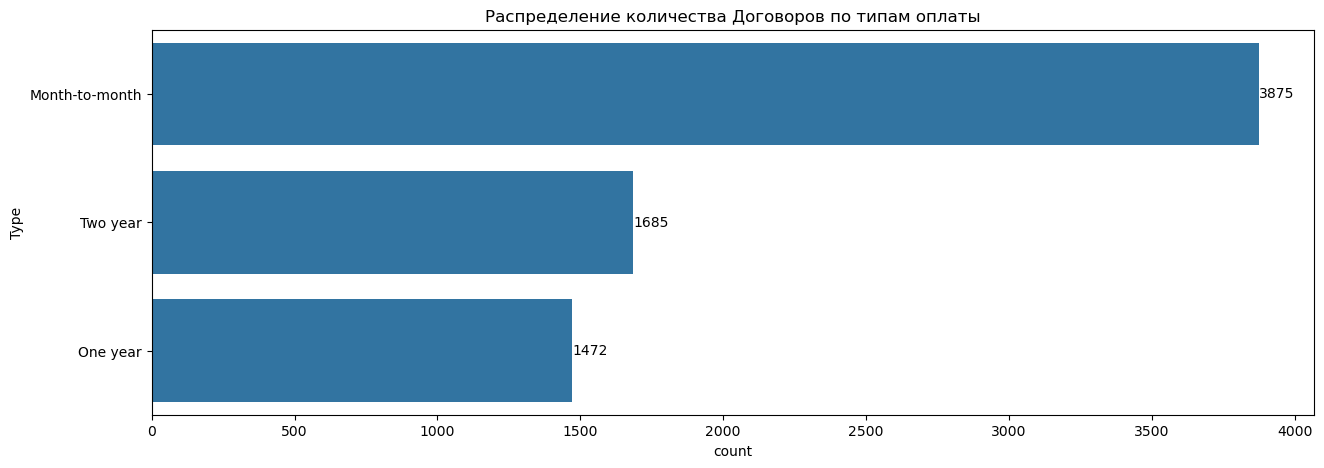

In [65]:
count_graph(df_contract, 'Type', 'Распределение количества Договоров по типам оплаты')

Как видно из графика выше, больше всего контрактов заключено по схеме оплаты каждый месяц, количество контрактов с оплатой раз в год и раз в два года ощутимо меньше и примерно равно друг другу

Посмотрим на распределение признака 'PaperlessBilling':

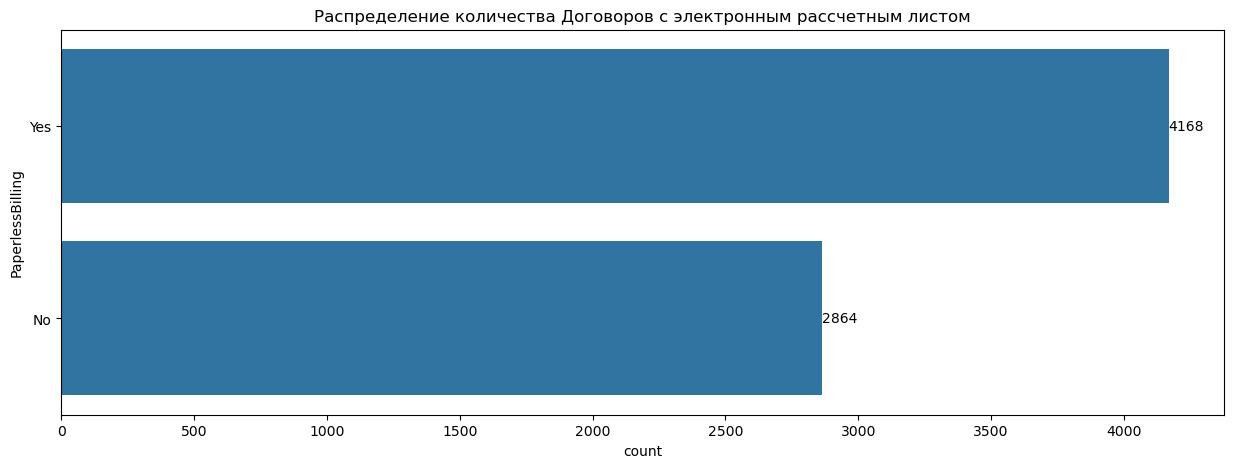

In [69]:
count_graph(df_contract, 'PaperlessBilling', 'Распределение количества Договоров с электронным рассчетным листом')

Как видно из графика выше, большая часть Договоров заключена с использованием электронного расчетного листа

Посмотрим на распределение признака 'PaymentMethod':

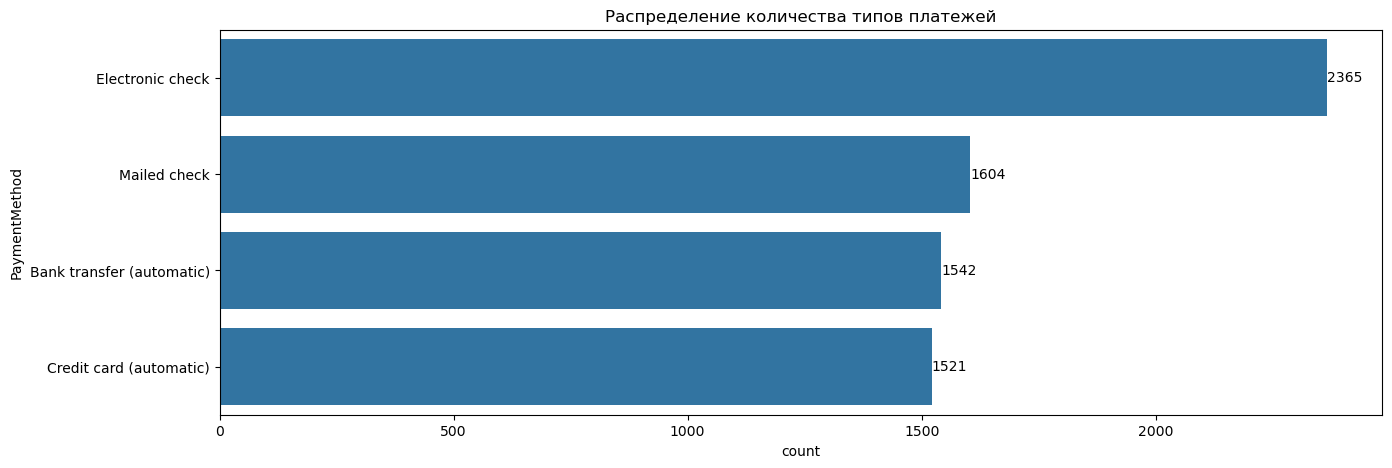

In [72]:
count_graph(df_contract, 'PaymentMethod', 'Распределение количества типов платежей')

Как видно из графика выше, большинство Договоров имеет тип платажей 'Elektronic check', количество других платежей ощутимо меньше и приблизительно равно друг другу

Посмотрим на распределение признака 'MonthlyCharges':

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

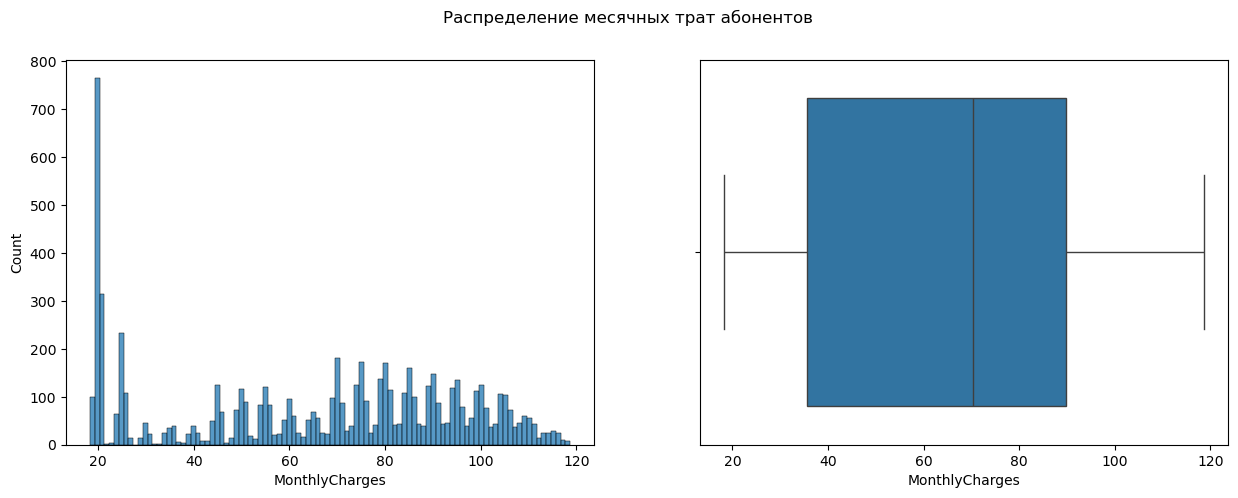

In [76]:
num_stat_and_graph(df_contract, 'MonthlyCharges', 100, 'Распределение месячных трат абонентов')

In [77]:
df_contract['MonthlyCharges'].mode()

0    20.05
Name: MonthlyCharges, dtype: float64

Как видно из графика выше, самое распространенное значение оплаты в месяц - 20.05, скорее всего это оплата самой востребованной услуги оператора

Посмотрим на распределение признака 'TotalCharges':

count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64

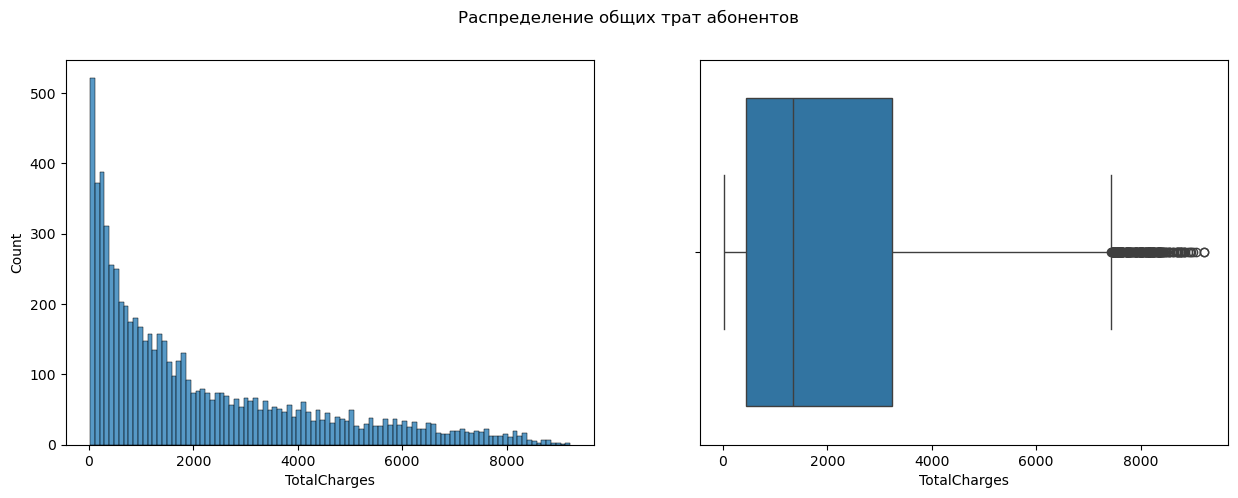

In [81]:
num_stat_and_graph(df_contract, 'TotalCharges', 100, 'Распределение общих трат абонентов')

Как видно график общих трат абонентов представляет собой ниспадающих линейный вид, так как общие затраты являются накопительными и распределены между абонентами с разной длительностью Договора

Загрузим датасет содержащий таблицу **personal**

In [85]:
df_personal = create_pd('personal')

   customerID  gender SeniorCitizen Partner Dependents
0  7590-VHVEG  Female             0     Yes         No
1  5575-GNVDE    Male             0      No         No
2  3668-QPYBK    Male             0      No         No
3  7795-CFOCW    Male             0      No         No
4  9237-HQITU  Female             0      No         No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB
None

              count unique         top  freq
customerID     7043   7043  7590-VHVEG     1
gender         7043      2        Male  3555
SeniorCitizen  7043      2           0  5901
Partner        7043      2        

In [86]:
df_personal.duplicated('customerID').sum()

0

Как видно из таблицы выше, датасет содержит 7043 значений, не имеет пропусков и явных дубликатов, однако содержит некорректный тип данных в столбце 'SeniorCitizen' - значения выражены строками, необходимо перевести их в целочисленный вид для удобства дальнейшей обработки.

In [88]:
df_personal['SeniorCitizen'] = df_personal['SeniorCitizen'].astype('int')

Проверим корректность преобразования:

In [90]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Конвертация типа данных выполнена корректно

Проведем **исследовательский анализ датасета df_personal**:

Посмотрим на распределение признака 'gender':

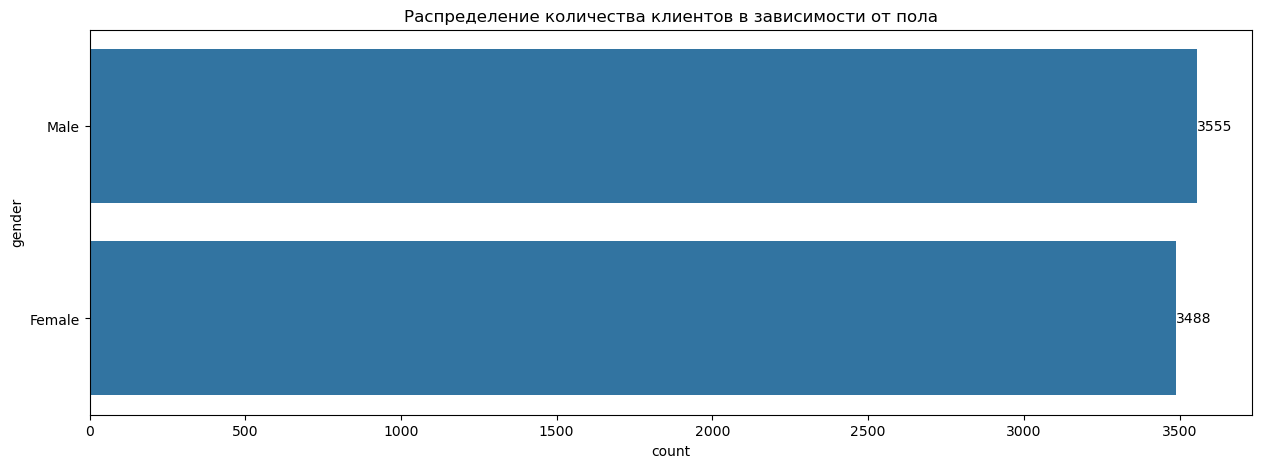

In [94]:
count_graph(df_personal, 'gender', 'Распределение количества клиентов в зависимости от пола')

Как видно из графика выше, количество клиентов-мужчин незначительно превышает количество клиентов-женщин

Посмотрим на распределение признака 'SeniorCitizen':

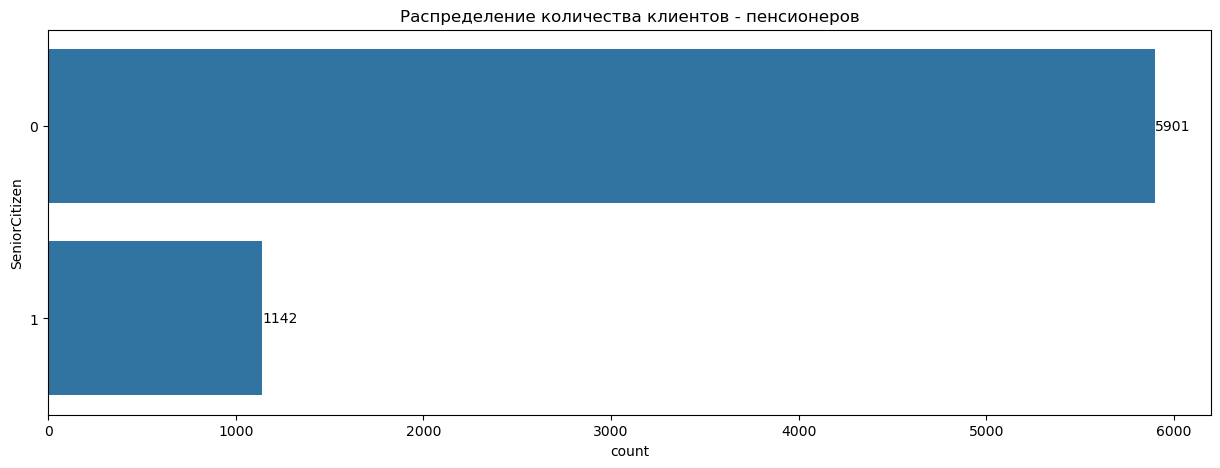

In [97]:
count_graph(df_personal, 'SeniorCitizen', 'Распределение количества клиентов - пенсионеров')

Как видно из графика выше, количество клиентов-пенсионеров существенно меньше, чем клиентов не являющихся таковыми

Посмотрим на распределение признака 'Partner':

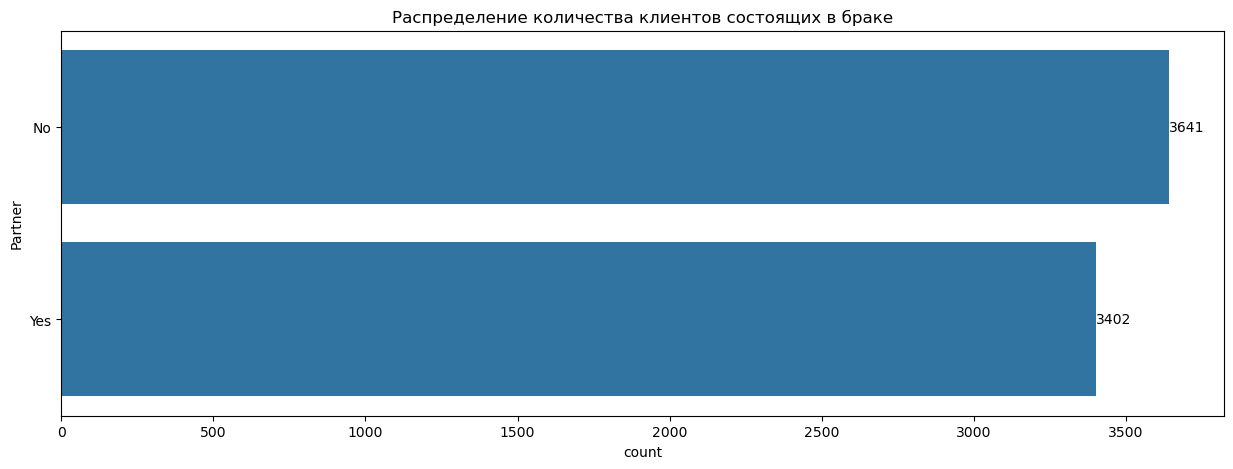

In [100]:
count_graph(df_personal, 'Partner', 'Распределение количества клиентов состоящих в браке')

Как видно из графика выше, клинтов не состоящих в браке незначительно больше, чем клиентов в браке

Посмотрим на распределение признака 'Dependents':

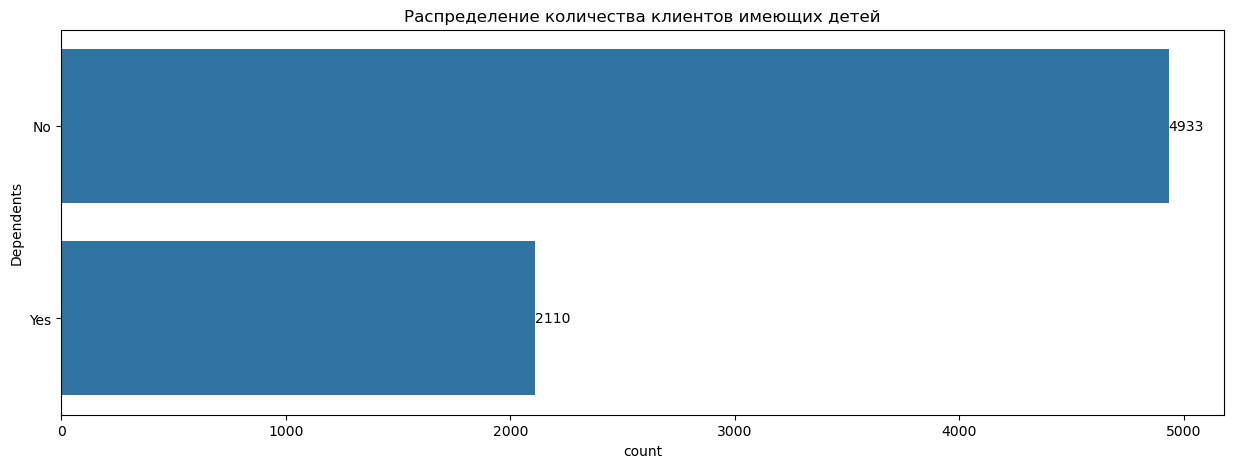

In [103]:
count_graph(df_personal, 'Dependents', 'Распределение количества клиентов имеющих детей')

Как видно из графика выше, клинтов не имеющих детей ощутимо  больше, чем клиентов с детьми

Загрузим датасет содержащий таблицу **internet**

In [107]:
df_internet = create_pd('internet')

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService  

Как видно из таблицы выше, датасет содержит 5517 значений, не имеет пропусков, явных дубликатов, а также некорректных типов данных

Проведем **исследовательский анализ датасета df_internet**:

Посмотрим на распределение признака 'InternetService':

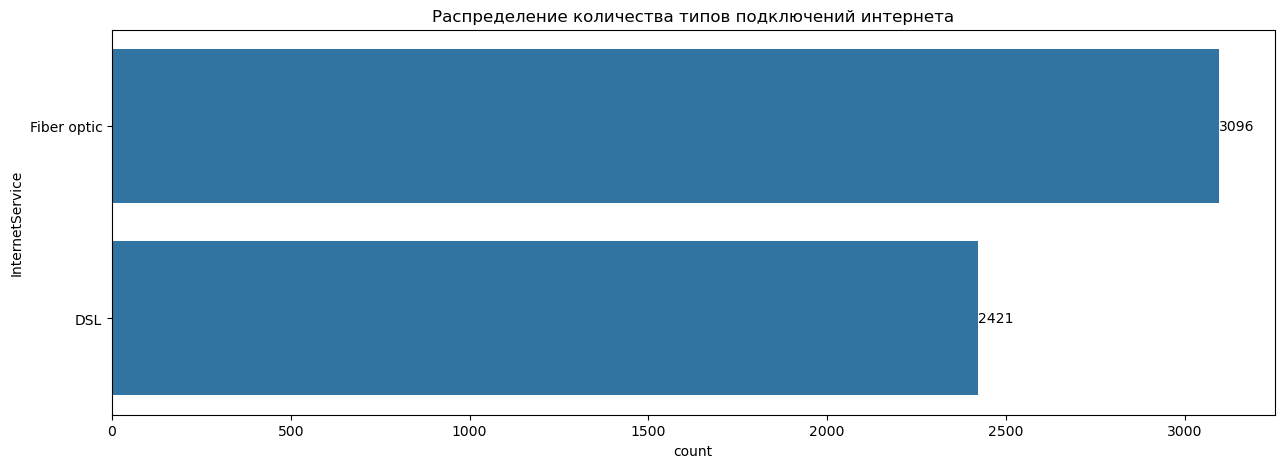

In [111]:
count_graph(df_internet, 'InternetService', 'Распределение количества типов подключений интернета')

Как видно из графика выше, клинтов с подключением интернета посредством оптоволоконного кабеля больше, нежели с подключением с помощью телефонной линии DSL

Посмотрим на распределение признака 'OnlineSecurity':

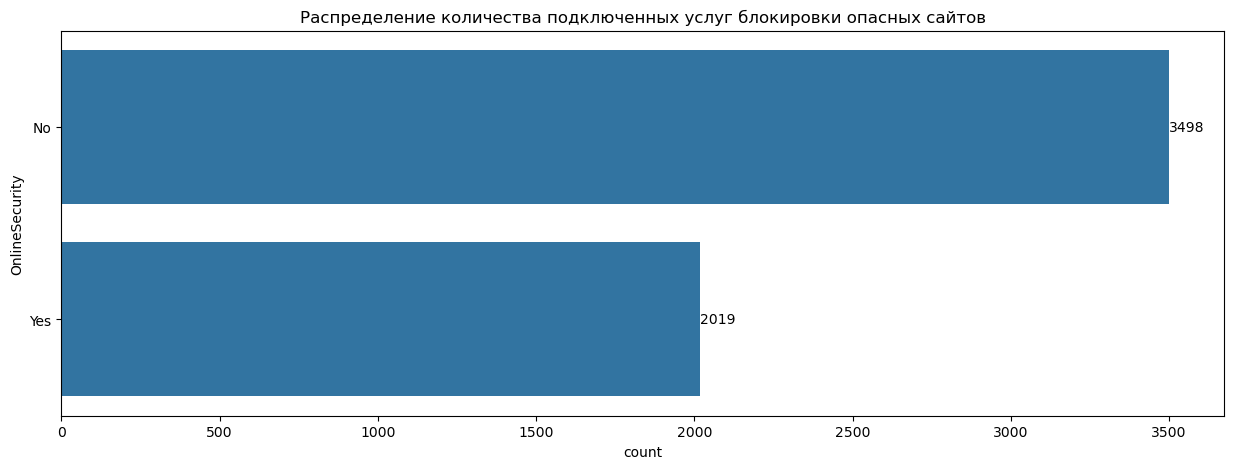

In [114]:
count_graph(df_internet, 'OnlineSecurity', 'Распределение количества подключенных услуг блокировки опасных сайтов')

Как видно из графика выше, клинтов подключивших услугу 'OnlineSecurity' (блокировка опасных сайтов) меньше, чем клиентов не пользующихся данной услугой 

Посмотрим на распределение признака 'OnlineBackup':

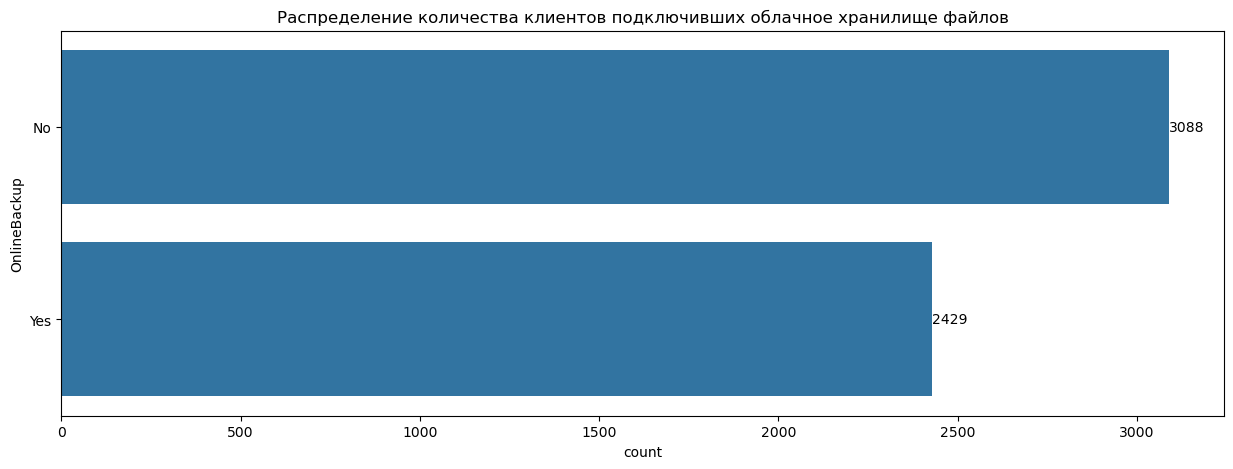

In [117]:
count_graph(df_internet, 'OnlineBackup', 'Распределение количества клиентов подключивших облачное хранилище файлов')

Как видно из графика выше, клинтов подключивших услугу 'OnlineBackup' (облачное хранилище файлов для резервного копирования данных) меньше, чем клиентов не пользующихся данной услугой 

Посмотрим на распределение признака 'DeviceProtection':

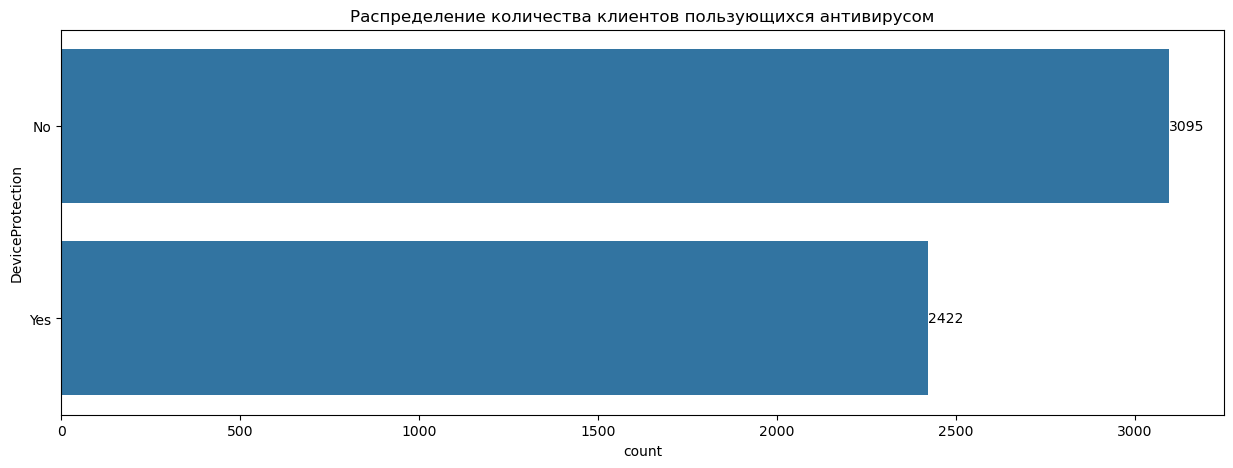

In [121]:
count_graph(df_internet, 'DeviceProtection', 'Распределение количества клиентов пользующихся антивирусом')

Как видно из графика выше, клинтов подключивших услугу 'DeviceProtection'(антивирус) меньше, чем клиентов не пользующихся данной услугой 

Посмотрим на распределение признака 'TechSupport':

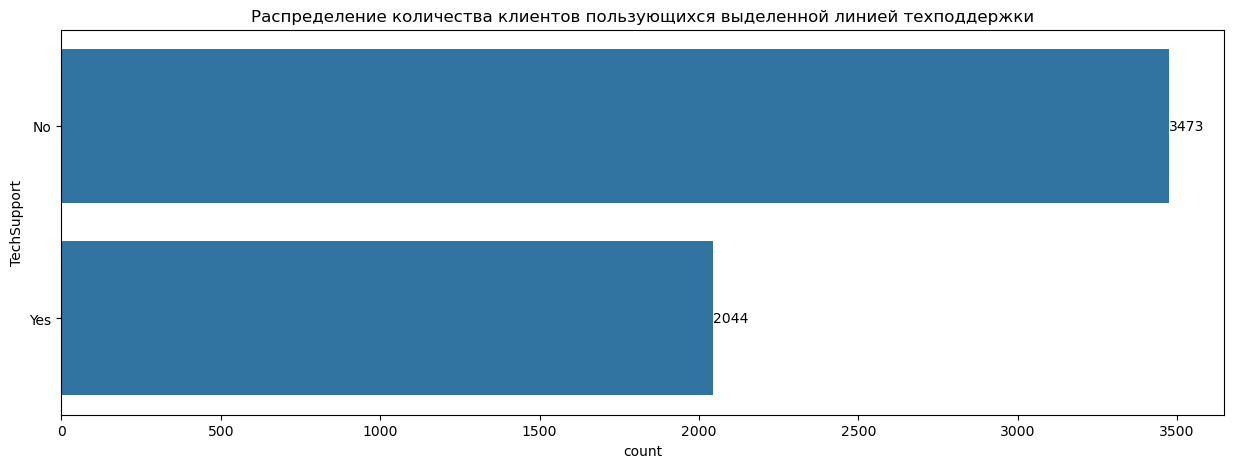

In [125]:
count_graph(df_internet, 'TechSupport', 'Распределение количества клиентов пользующихся выделенной линией техподдержки')

Как видно из графика выше, клинтов подключивших услугу 'TechSupport'(выделенная линия техподдержки) меньше, чем клиентов не пользующихся данной услугой 

Посмотрим на распределение признака 'StreamingTV':

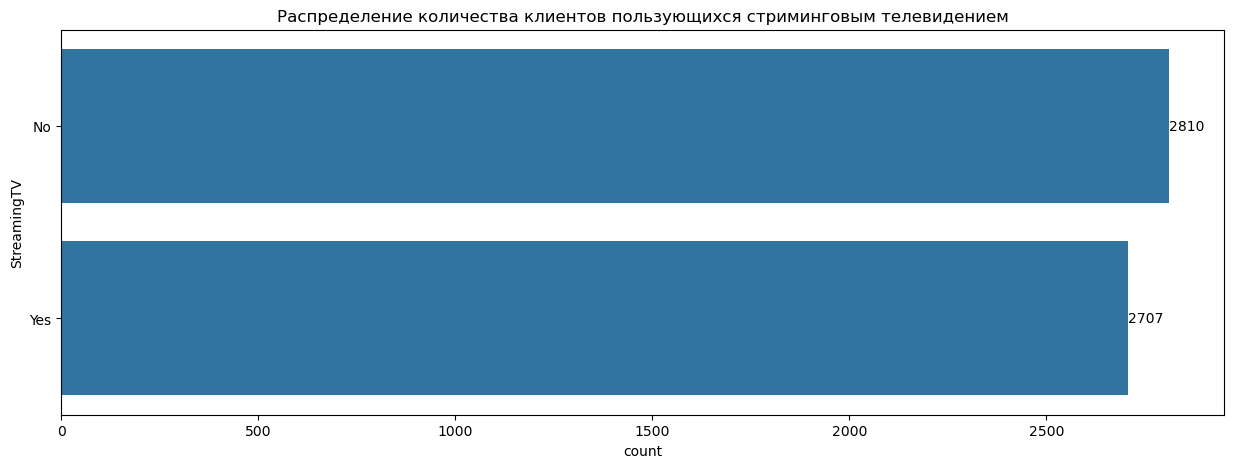

In [129]:
count_graph(df_internet, 'StreamingTV', 'Распределение количества клиентов пользующихся стриминговым телевидением')

Как видно из графика выше, клинтов подключивших услугу 'StreamingTV'(стриминговое телевидение) незначительно меньше, чем клиентов не пользующихся данной услугой 

Посмотрим на распределение признака 'StreamingMovies':

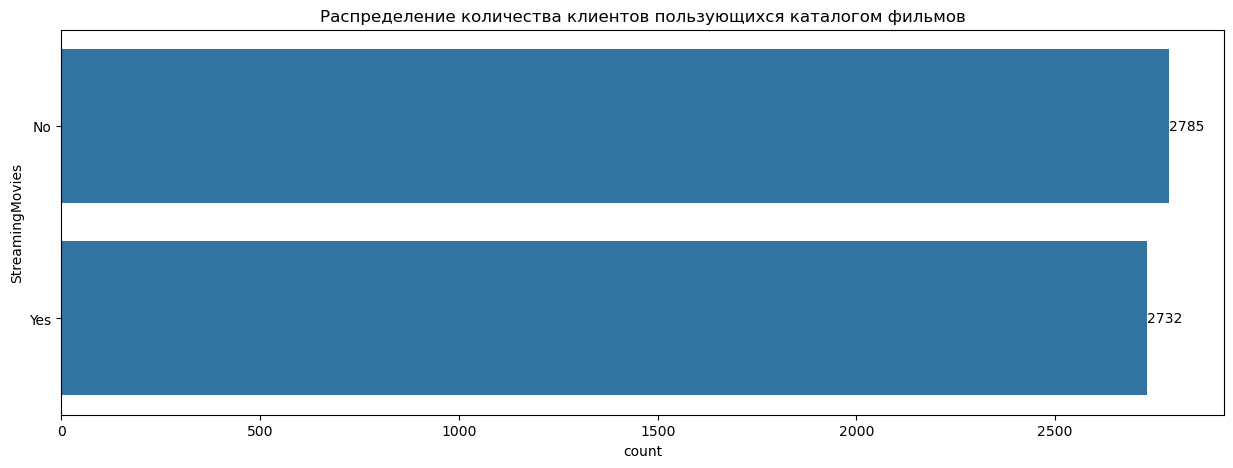

In [133]:
count_graph(df_internet, 'StreamingMovies', 'Распределение количества клиентов пользующихся каталогом фильмов')

Как видно из графика выше, клинтов подключивших услугу 'StreamingMovies'(каталог фильмов) незначительно меньше, чем клиентов не пользующихся данной услугой 

Загрузим датасет содержащий таблицу **phone**

In [137]:
df_phone = create_pd('phone')

   CustomerId MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerId     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

              count unique         top  freq
CustomerId     6361   6361  5575-GNVDE     1
MultipleLines  6361      2          No  3390

Пропусков в датасете:
 CustomerId       0
MultipleLines    0
dtype: int64

Явных дубликатов: 0


Как видно из таблицы выше, датасет содержит 6631 значение, не имеет пропусков, явных дубликатов, а также некорректных типов данных

Проведем **исследовательский анализ датасета df_phone**:

Посмотрим на распределение признака 'MultipleLines':

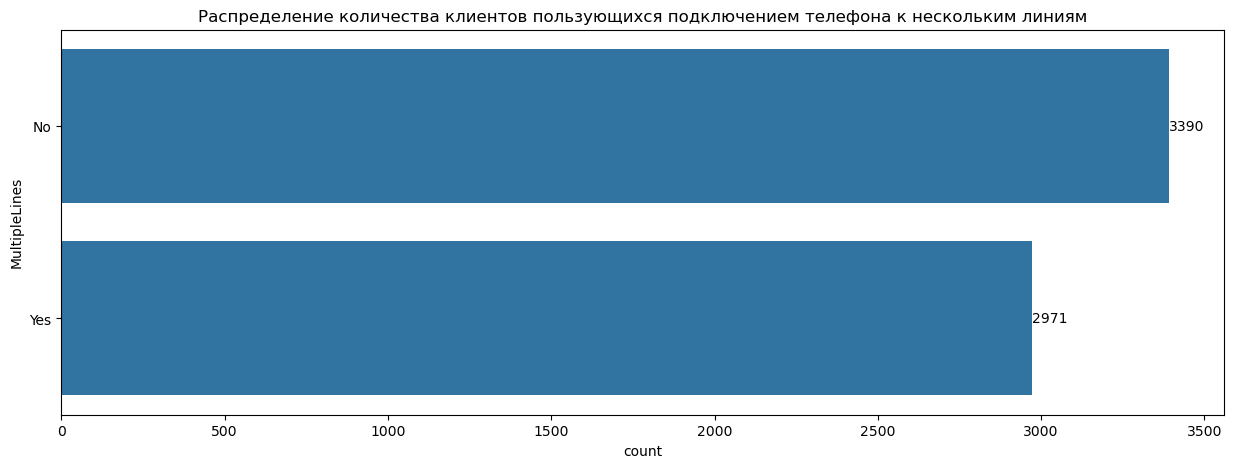

In [141]:
count_graph(
    df_phone, 'MultipleLines', 
    'Распределение количества клиентов пользующихся подключением телефона к нескольким линиям')

Как видно из графика выше, клинтов подключивших услугу 'MultipleLines'(подключение телефона к нескольким линиям одновременно) меньше, чем клиентов не пользующихся данной услугой 

Объединим иследованные выше датафреймы в единый датасет. Объединение будем выполнять по идентификационному номеру клиента 'CustomerId'

Сначала объеденим датасеты df_contract и  df_personal

In [146]:
df_contract.shape

(7032, 8)

In [147]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50


In [148]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [149]:
df_personal.shape

(7043, 5)

In [150]:
df = df_contract.merge(df_personal, on = 'customerID', how='left')

In [151]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No


In [152]:
df.shape

(7032, 12)

К полученному датасету добавим датафрейм df_internet:

In [154]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [155]:
df_internet.shape

(5517, 8)

In [156]:
df = df.merge(df_internet, on = 'customerID', how='left')

In [157]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [158]:
df.shape

(7032, 19)

К полученному датасету добавим датафрейм df_phone:

In [160]:
df_phone.head()

,CustomerId,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [161]:
df_phone.shape

(6361, 2)

Прежде чем присоединить последний датафрейм, необходимо переименовать столбец 'CustomerId' ы соответствие с наименованием данного столбца в других датафреймах - 'customerID': 

In [163]:
df_phone = df_phone.rename(columns = {'CustomerId': 'customerID'})

In [164]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [165]:
df = df.merge(df_phone, on = 'customerID', how='left')

In [166]:
df.shape

(7032, 20)

In [167]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Проверим итоговый датасет на наличие пропусков:

In [170]:
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

По количеству пропусков в датасете можно заметить что по 1520 пропусков имеют контракты тех пользователей, у которых подключен интернет, но не подключен телефон, 680 пропусков для клиентов с подключенной телефонией, но без интернета. Исходя из этой логики, можем заполнить все пропуски категориальным значением 'Not used'

In [174]:
df = df.fillna('Not used')

In [175]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Not used
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,Not used
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Добавим к датасету новый признак 'ContractDuration' - разница между датой расторжения и заключения Договора

In [177]:
df['ContractDuration'] = (df['EndDate'] - df['BeginDate']).dt.days

Также добавим признак 'ChangePackage', который будет показывать, менял ли клиент тариф в процессе взаимодействия с оператором. Признак создадим по следующиму принципу: если текущая длительность контракта умноженная на месячную плату равна общим затратам абонента, признаку присваивается значение 0, в случае несовпадения - 1.

In [179]:
df['ChangePackage'] = (
    ((df['MonthlyCharges'] * (df['EndDate'].dt.month - df['BeginDate'].dt.month)) == (df['TotalCharges'])).astype('int')
)

Также добавим целевой признак 'target', который будет равен 0, в случае когда 'EndDate' = '2020-02-01', т.к. именно этим значением ранее мы заменили значение 'No', которое являлось  показателем того, что контракт действующий. т.к. преред нами стоит задача предсказания оттока клиентов, значение 1 будет присвоено клиентам с закрытыми контрактами.

In [181]:
df['Target'] = (df['EndDate'] != '2020-02-01').astype('int')

In [182]:
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
ContractDuration    0
ChangePackage       0
Target              0
dtype: int64

Проверим итоговый датасет на наличие явных дубликатов:

In [184]:
df.duplicated().sum()

0

Также проверим наличие дубликатов по ID клиента

In [186]:
df.duplicated('customerID').sum()

0

Дубликаты по идентификационному номеру клиента отсутствуют

Проведем исследовательский анализ для признаков объединенного датасета с учетом их распределения по таргету (0 - контракт децствует, 1- контракт расторгнут:

In [189]:
def count_graph_hue(df, col, col2, name):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.countplot(y=df[col], hue = df[col2],
         order=df[col].value_counts(ascending=False).index);
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
    ax.set_title(name);

Посмотрим на распределение признака 'InternetService':

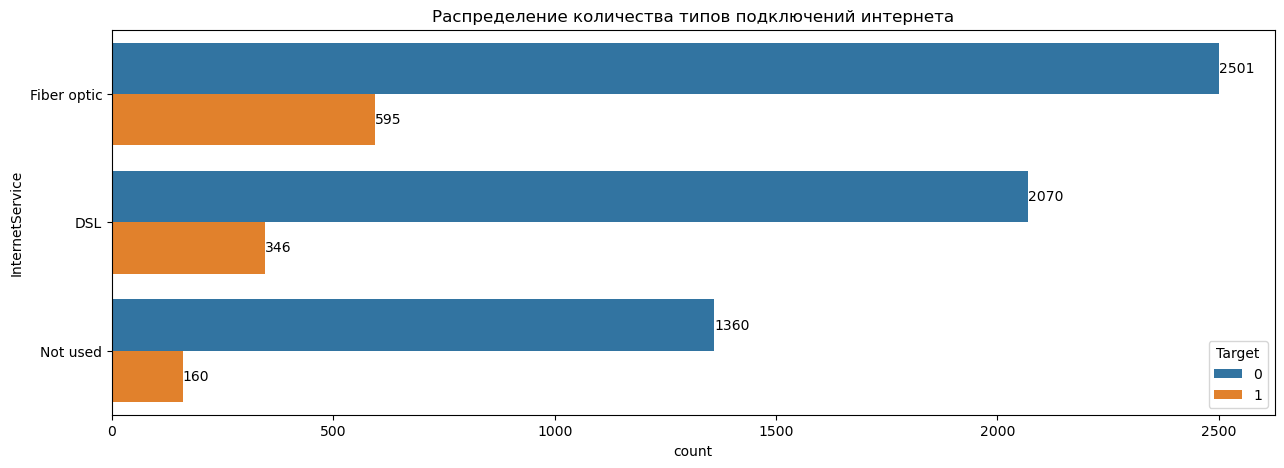

In [191]:
count_graph_hue(df, 'InternetService', 'Target', 'Распределение количества типов подключений интернета')

Как видно из графика выше, клеинты с подключением интернета посредством оптоволоконного кабеля чаще расторгают Договор на обслуживание, относительно клиентов с подключением с помощью телефонной линии DSL. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу (безотносительно, каким способом).

Посмотрим на распределение признака 'OnlineSecurity':

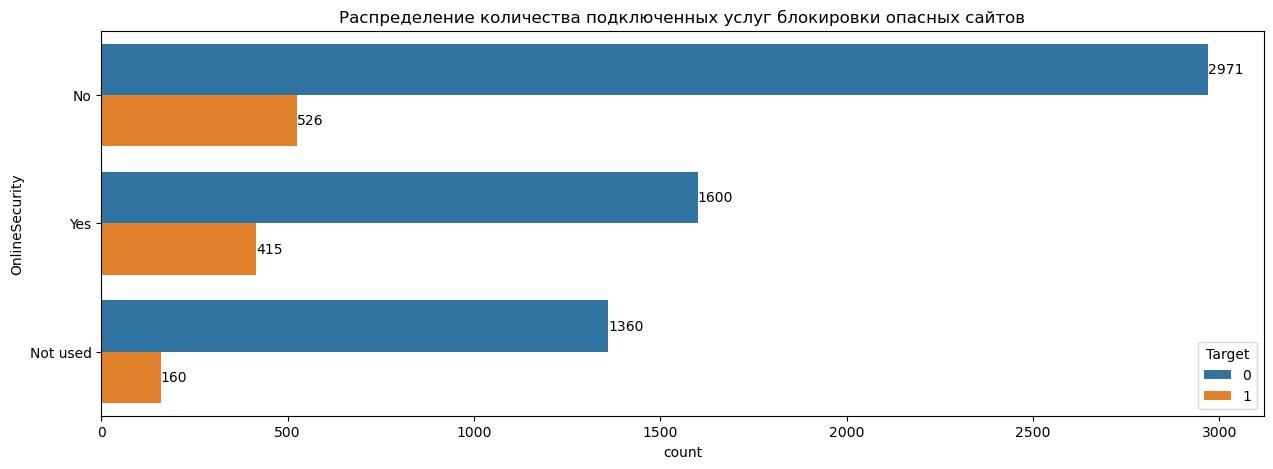

In [194]:
count_graph_hue(df, 'OnlineSecurity', 'Target', 'Распределение количества подключенных услуг блокировки опасных сайтов')

Как видно из графика выше, клинты подключившие услугу 'OnlineSecurity' (блокировка опасных сайтов) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу.

Посмотрим на распределение признака 'OnlineBackup':

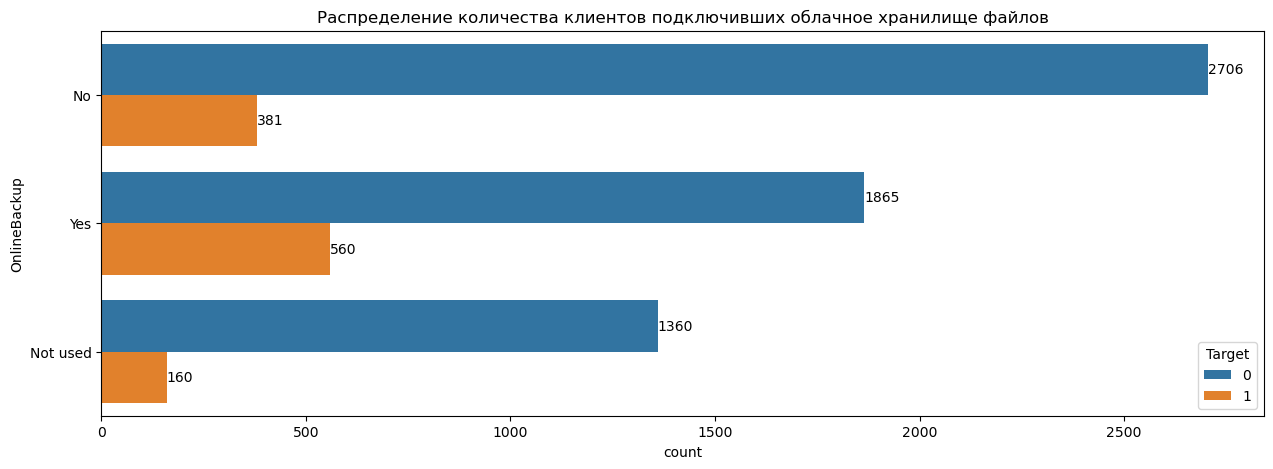

In [197]:
count_graph_hue(df, 'OnlineBackup', 'Target', 'Распределение количества клиентов подключивших облачное хранилище файлов')

Как видно из графика выше, клинтов подключивших услугу 'OnlineBackup' (облачное хранилище файлов для резервного копирования данных) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу.

Посмотрим на распределение признака 'DeviceProtection':

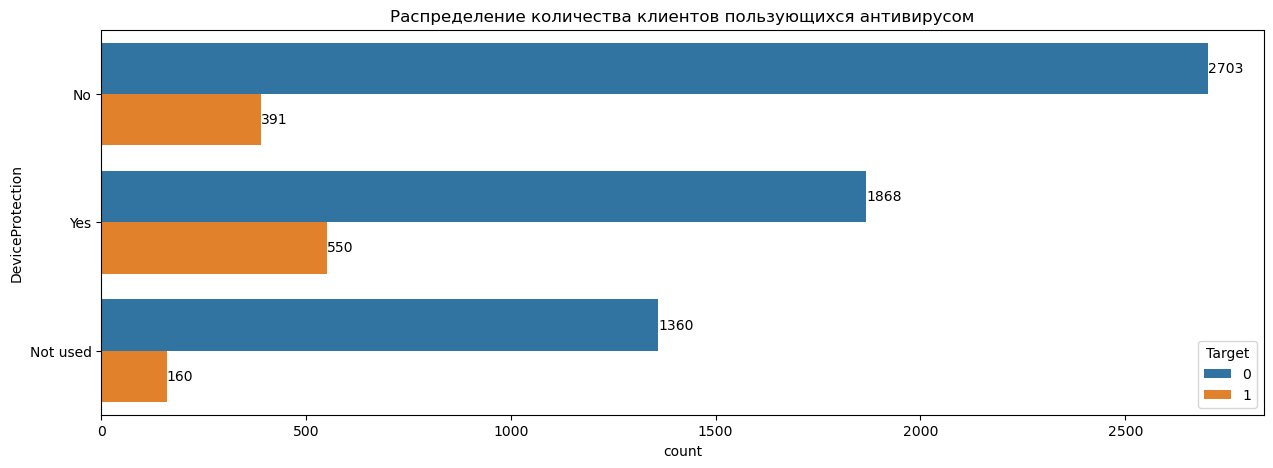

In [200]:
count_graph_hue(df, 'DeviceProtection', 'Target', 'Распределение количества клиентов пользующихся антивирусом')

Как видно из графика выше, клинтов подключивших услугу 'DeviceProtection'(антивирус) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу.

Посмотрим на распределение признака 'TechSupport':

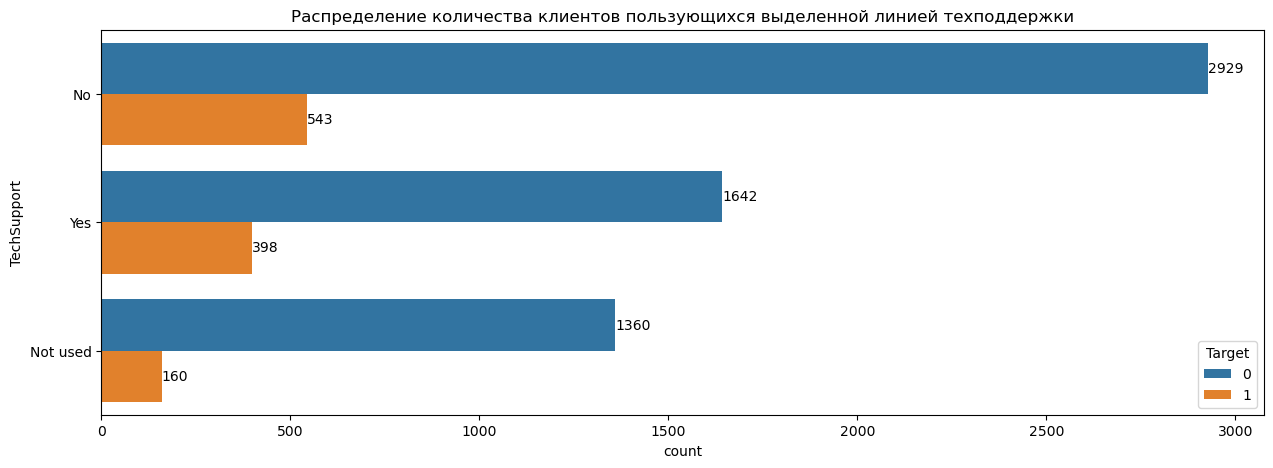

In [203]:
count_graph_hue(df, 'TechSupport', 'Target', 'Распределение количества клиентов пользующихся выделенной линией техподдержки')

Как видно из графика выше, клинтов подключивших услугу 'TechSupport'(выделенная линия техподдержки) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу.

Посмотрим на распределение признака 'StreamingTV':

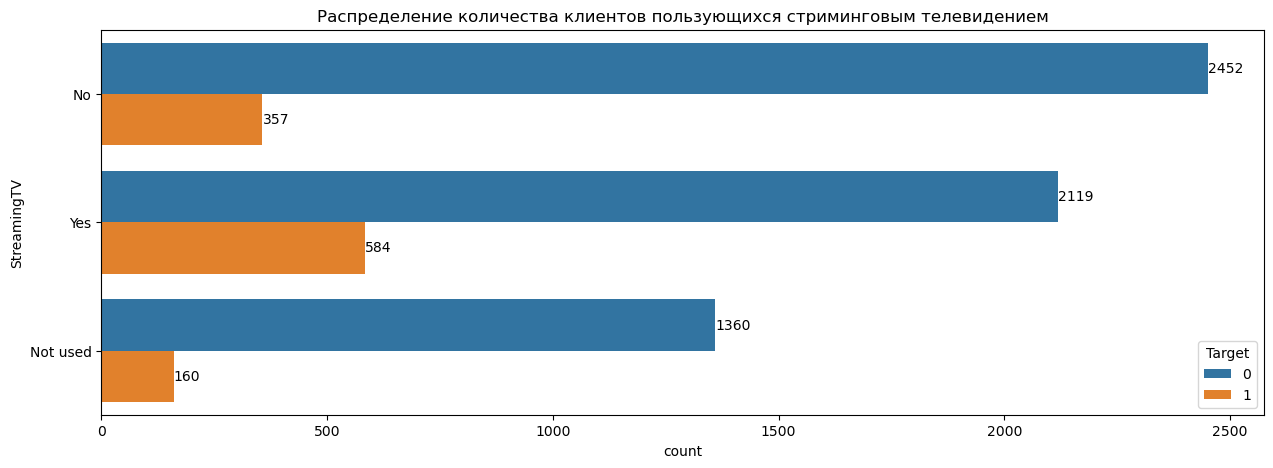

In [206]:
count_graph_hue(df, 'StreamingTV', 'Target', 'Распределение количества клиентов пользующихся стриминговым телевидением')

Как видно из графика выше, клинтов подключивших услугу 'StreamingTV'(стриминговое телевидение) чаще расторгают Договор, относительно  клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу. 

Посмотрим на распределение признака 'StreamingMovies':

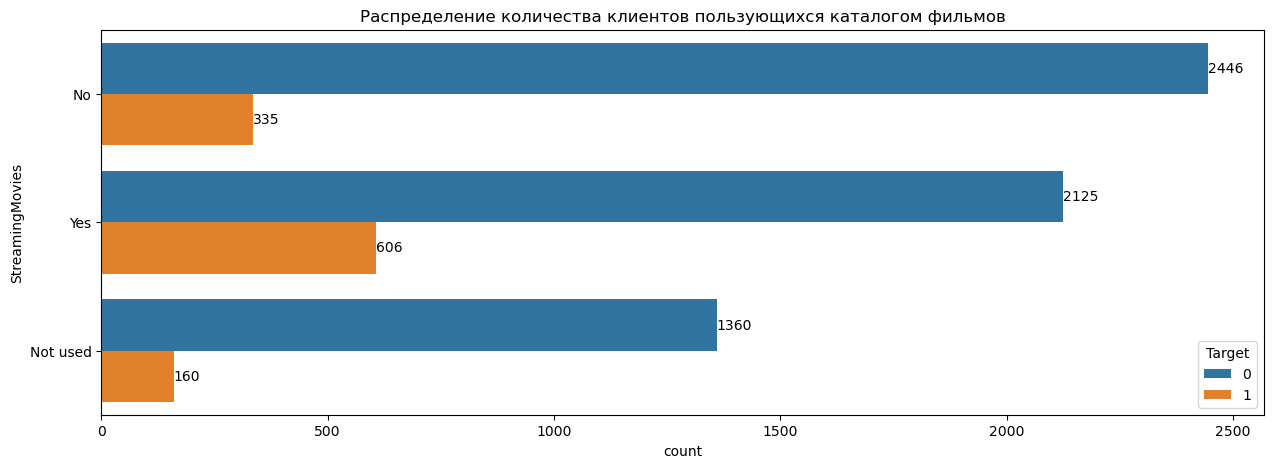

In [209]:
count_graph_hue(df, 'StreamingMovies', 'Target', 'Распределение количества клиентов пользующихся каталогом фильмов')

Как видно из графика выше, клинтов подключивших услугу 'StreamingMovies'(каталог фильмов) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к интернету, расторгают Договор реже, чем подключившие данную услугу.

Посмотрим на распределение признака 'MultipleLines':

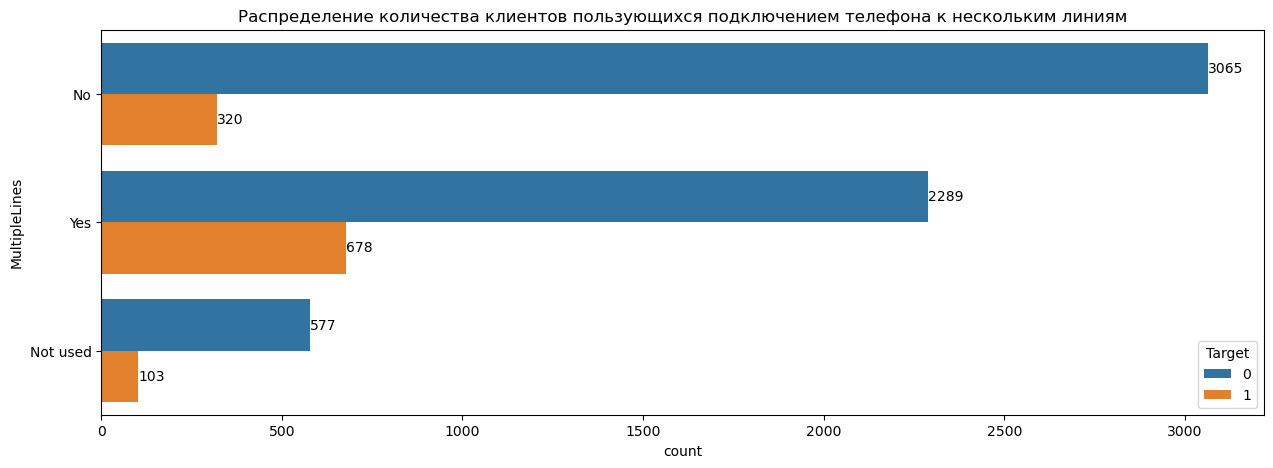

In [212]:
count_graph_hue(
    df, 'MultipleLines', 'Target',
    'Распределение количества клиентов пользующихся подключением телефона к нескольким линиям')

Как видно из графика выше, клиенты подключившие услугу 'MultipleLines'(подключение телефона к нескольким линиям одновременно) чаще расторгают Договор, относительно клиентов не пользующихся данной услугой. Клиенты не имеющие подключения к телефонии, расторгают Договор чаше, чем клиенты не подключившие услугу 'MultipleLines', но реже чем клиенты с телефонией и подключенной услугой.

Посмотрим на распределение признака 'ChangePackage':

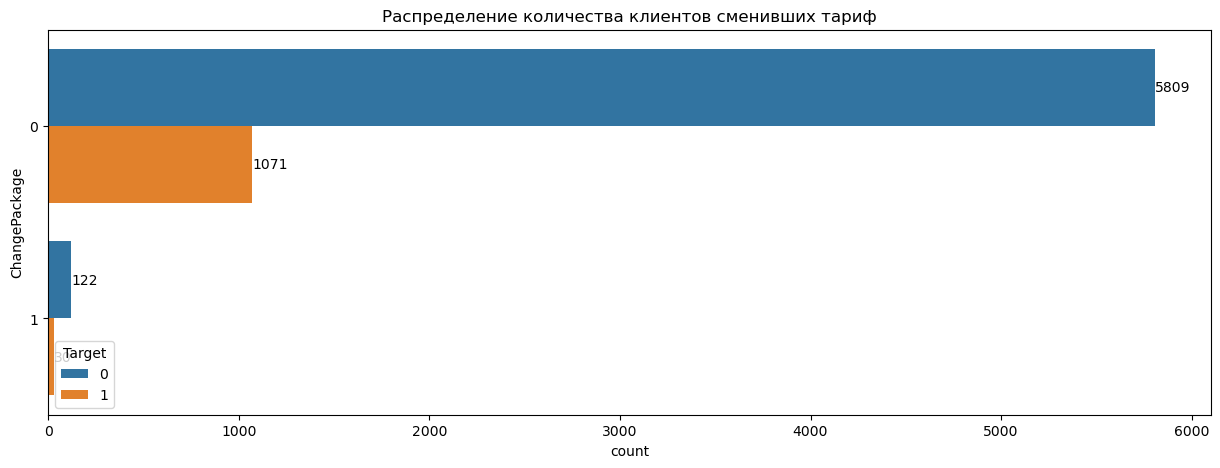

In [215]:
count_graph_hue(
    df, 'ChangePackage', 'Target',
    'Распределение количества клиентов сменивших тариф')

Как видно из графика выше, клиенты не менявшие тариф, расторгают Договор реже, чем клиенты изменившие тарифный план, с момоента заключения Договора.

Посмотрим на распределение признака 'ContractDuration':

count    7032.000000
mean      899.961320
std       682.738777
min        28.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: ContractDuration, dtype: float64

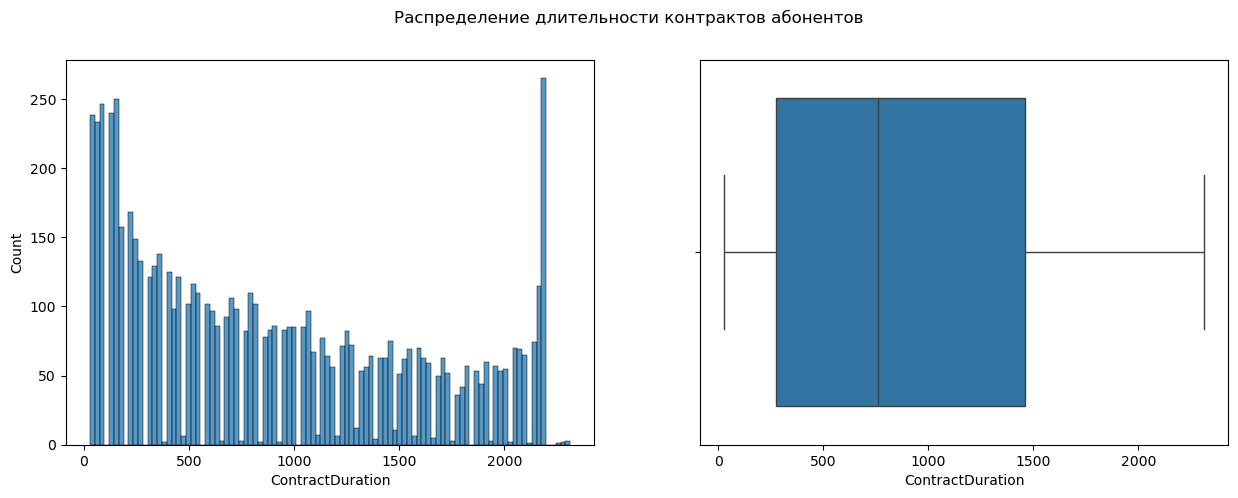

In [218]:
num_stat_and_graph(df, 'ContractDuration', 100, 'Распределение длительности контрактов абонентов')

Как видно из графика выше, в целом график длительности контрактов имеет линейный характер с тенденцией к уменьшению значений, что логично, т.к. со временем клиентов становится больше и количество контактов с малой длительностью увеличивается. Увеличенное количество контрактов в районе 0 может также быть связано с тем, что какая та часть клиентов отказывается от контракта в короткое время после опробования услуг, не будучи удовлетворенными их качемтвом. Всплеск количества значений в крайней правой части графика связано с тем, что таким образом отражены незакрытые контракты. 

Посмотрим на распределение признака 'Target':

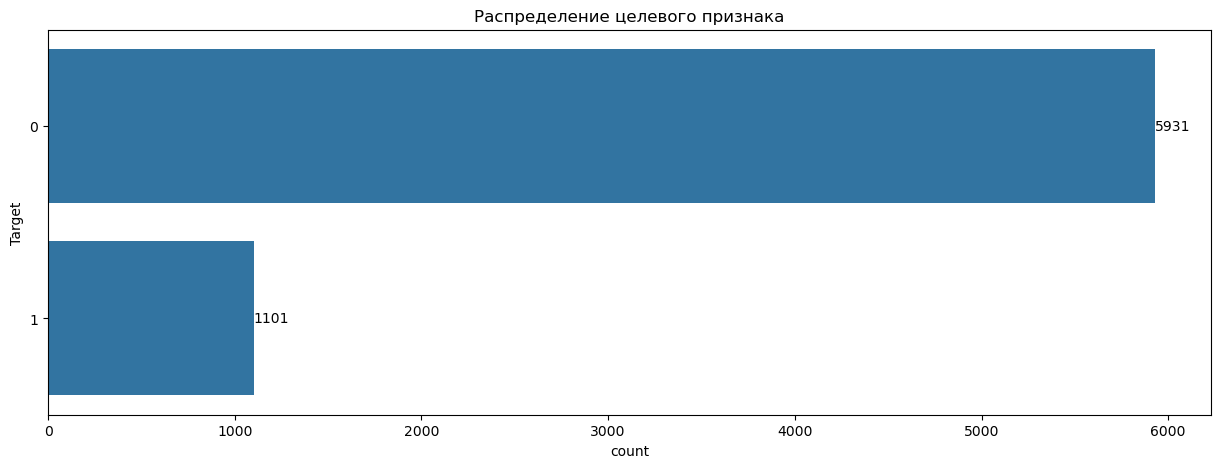

In [221]:
count_graph(
    df, 'Target', 
    'Распределение целевого признака')

Как видно из графика выше, клиентов расторгнувших Договор с оператором, существенно меньше, чем клиентов продолжающих пользоваться его услугами

Исследуем итоговый датасет на предмет корреляции признаков с помощью библиотеки phik:

/home/pc-mint/anaconda3/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 1758000. Are interval variables set correctly?
  warnings.warn(


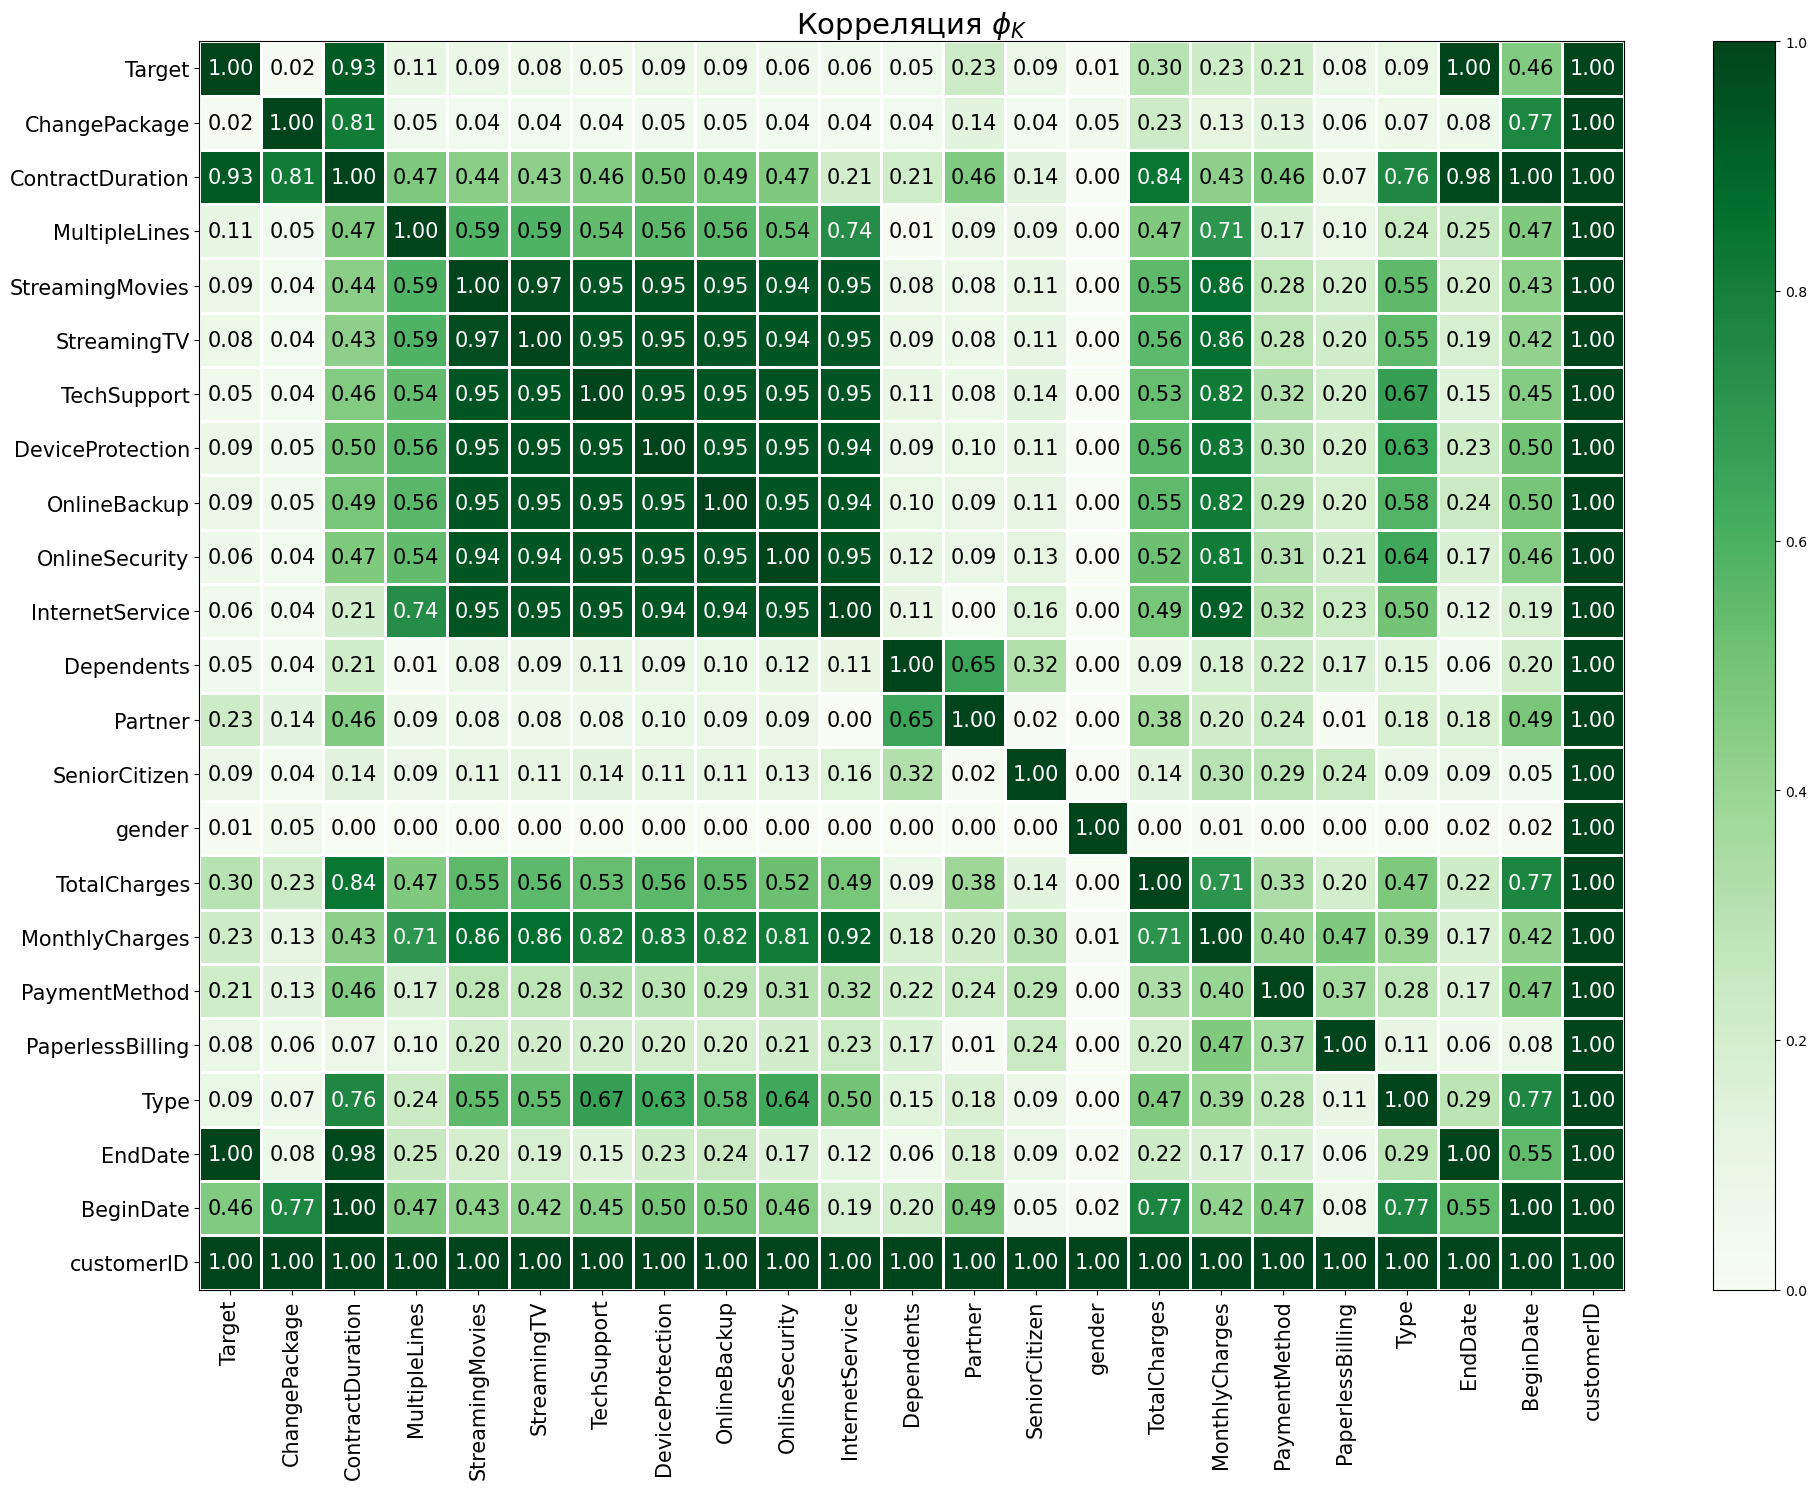

In [224]:
interval_cols = ['MonthlyCharges', 'TotalCharges']
phik_overview = phik_matrix(df, interval_cols=interval_cols) 
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))

Уберем из датасета признаки 'customerID' как не несущий информационной ценности и 'BeginDate', 'EndDate' - в целях избежания утечки данных о целевом признаке, 'MonthlyCharges', 'TotalCharges' - как сильно коррелирующие с другими признаками, 'Dependents' как коррелирующий с 'Partner',  'StreamingMovies' и 'StreamingTV'  - в результате проведенных экспериментов.

In [226]:
df = df.drop([
    'customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 
    'TotalCharges', 'StreamingMovies', 'StreamingTV', 'Dependents'
], axis=1)

Выведем матрицу корреляции без удаленных признаков:

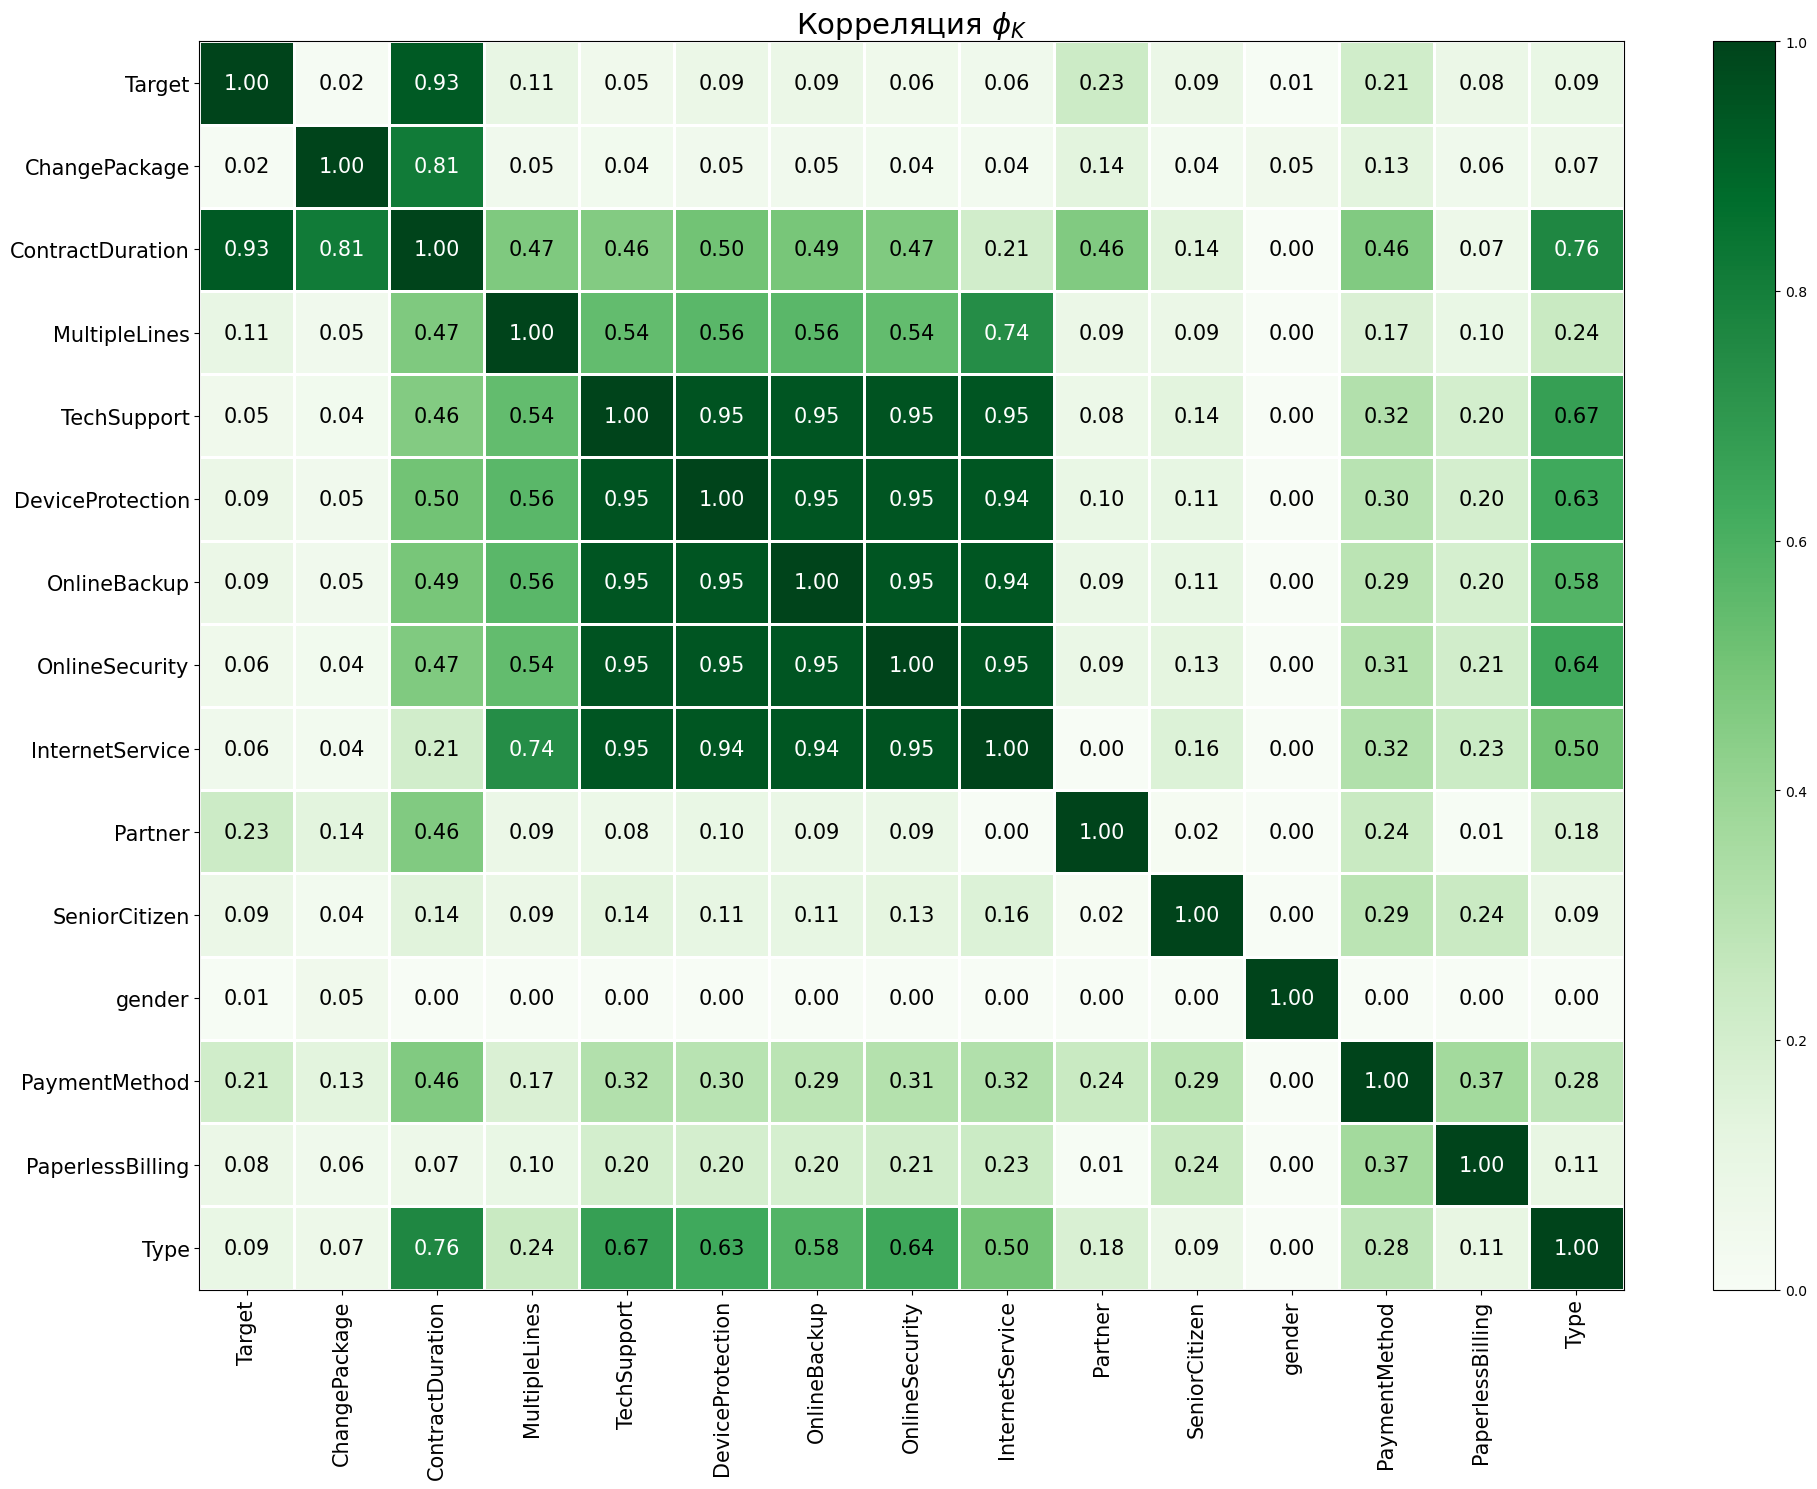

In [228]:
interval_cols = []
phik_overview = phik_matrix(df, interval_cols=interval_cols) 
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))

Как видно по коэффициентам корреляции в матрице и тепловой карте выше, в датасете остались сильно коррелирующие входные признаки 'ChangePackage' и 'ContractDuration', а также 'ContractDuration' и 'Type', однако все эти признаки оставлены в обучающем датасете оставлены, т.к. удаление любого из них, ведет к снижению целевых метрик.

Как видно по коэффициентам корреляции в матрице и тепловой карте выше, в исследуемом датасете отсутствуют сильнокоррелирующие положительно параметры, имеются параметры имеющие сильную отрицательную корреляцию - 'минут_предыдущий_месяц' и 'минут_текущий_месяц'. Учтем данный факт при дальнейшем моделировании.

**Вывод:**   
В рамках данного раздела:  
- загружены необходимые для исследования датасеты;
- датасеты проверены на корректность вывода;
- датасет проверен на наличие пропусков в данных (выявленные пропуски удалены);
- данные проверены на наличие явных дубликатов (не выявлены);
- значения имеющие некорректный тип данных приведены к типу, наиболее подходящему, для проведения исследования;
- проведен исследовательский анализ в части распределений входных признаков
- исходные датафреймы объединены в итоговый датасет с учётом особенностей услуг телекоммуникации;
- объединенный датасет исследован на пропуски и явные дубликатыю Выявленные пропуски обработаны, дубликаты не выявлены
- сформирован целевой признак;
- сформированы дополнительные входные признаки
- проведен исследовательский анализ, в том числе в разрезе распределения признаков по таргету
- проведен корреляционный анализ, по итогу скорректирован состав обучающего датасета
<a id='section_id3'></a>

## Обучение моделей

### Модели классического машинного обучения

Напишем пайплайн для определения лучших гиперпараметров машинного обучения.  
В качестве кодировщика примем кодировщик OheHotEncoder.  
В качестве скейлеров используем StandaradScaler, MinMaxScaler, RobustScaler.  
В качестве моделей МО применим:  
а) RandomForestClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'max_features'.
б) LGBMClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'learning_rate'.
в) CatBoostClassifier() с перебором гиперпараметров 'depth', 'loss_function', 'learning_rate'.
г) NeuralNet()   
В качестве метрики, с помощью которой будет оцениваться качество модели, будем использовать ROC-AUC, т.к. она показывает отношение верно классифицированных объектов класса 1 (клиенты, по которым прогнозируется возможное расторжение Договора) к ошибочно классифицированным объектам (когда клиент для которого расторжение не случилось бы, мы классифицировали как целевого клиента), на всех порогах классификации. Таким образом мы максимизируем выявление клиентов, склонных к расторжению Договора, что и является целью данного исследования.

Разделим данные на тренировочную и тестовые выборки, а также выполним предобработку данных (масштабирование и кодирование).

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Target'], axis=1),
    df['Target'], 
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

num_columns = ['ContractDuration']

cat_columns  = [
    'Type', 'gender', 'PaymentMethod', 'InternetService',
    'PaperlessBilling', 'SeniorCitizen', 'Partner', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport',  'MultipleLines',  'ChangePackage'
]

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

data_preprocessor = ColumnTransformer(
    [('cat', ohe_pipe, cat_columns),
    ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

**RandomForestClassifier()**

In [241]:
pipe_rfc = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', RandomForestClassifier(random_state=RANDOM_STATE))
])

param_rfc = {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__class_weight': ['balanced', None],
        'models__n_estimators': range(800, 1000, 50),
        'models__max_features': ['log2', 'sqrt', None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']
}

grid_rfc = GridSearchCV(
    pipe_rfc,
    param_rfc,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rfc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_rfc.best_estimator_)
print('Лучшая метрика на кросс-валидационной выборке:', grid_rfc.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Type', 'gender',
                                                   'PaymentMethod',
                                                   'InternetService',
                                 

**LGBMClassifier()**

In [243]:
pipe_lgbm = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LGBMClassifier(random_state=RANDOM_STATE, verbose= -1))
])

param_lgbm = {
        'models': [LGBMClassifier(random_state=RANDOM_STATE, verbose= -1)],
        'models__class_weight': ['balanced', None],
        'models__n_estimators': range(100, 300, 100),
        'models__learning_rate': np.arange(0.08, 0.12, 0.01),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']
}  


grid_lgbm = GridSearchCV(
    pipe_lgbm,
    param_lgbm,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_lgbm.best_estimator_)
print('Лучшая метрика на кросс-валидационной выборке:', grid_lgbm.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Type', 'gender',
                                                   'PaymentMethod',
                                                   'InternetService',
                                 

**CatBoostClassifier()**

In [245]:
pipe_ctboost = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', CatBoostClassifier(random_state = RANDOM_STATE, silent=True))
])

param_ctboost = {
        'models': [CatBoostClassifier(random_state = RANDOM_STATE, silent=True)],
        'models__depth': range(5,11),
        'models__loss_function': ['Logloss', 'CrossEntropy'],
        'models__learning_rate': np.arange(.03, 0.06, .01),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),  'passthrough']
}

grid_ctboost = GridSearchCV(
    pipe_ctboost,
    param_ctboost,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_ctboost.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_ctboost.best_params_)
print('Лучшая метрика на кросс-валидационной выборке:', grid_ctboost.best_score_)

Лучшая модель и её параметры:

 {'models': <catboost.core.CatBoostClassifier object at 0x7f6b40b66b50>, 'models__depth': 5, 'models__learning_rate': 0.05, 'models__loss_function': 'Logloss', 'preprocessor__num': StandardScaler()}
Лучшая метрика на кросс-валидационной выборке: 0.9340411389106842


### Нейронные сети

Построим нейронную сеть, для предсказания оттока клиентов

Ниже, установим параметры, необходимые для воспроизводимости результатов расчетов:

In [251]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True
    
set_seed(RANDOM_STATE)

Создадим класс нейронной сети. Определим входные, выходные функции и функции активации

In [253]:
class NeuralNet(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=0.55)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.dp2 = nn.Dropout(p=0.55)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.bn3 = nn.BatchNorm1d(n_hidden_neurons_3)
        self.dp3 = nn.Dropout(p=0.55)
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)
        self.bn4 = nn.BatchNorm1d(n_out_neurons)
        self.dp4 = nn.Dropout(p=0.55)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.dp1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.dp2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.dp3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.dp4(x)
        return x  

Выполним предобрабоку тренировочной и тестовой выборок:

In [255]:
data_preprocessor.fit(X_train)
X_train_preprocessed = data_preprocessor.transform(X_train)
data_preprocessor.fit(X_test)
X_test_preprocessed = data_preprocessor.transform(X_test)

Преобразуем предобработанные данные в тензоры:

In [257]:
X_train_nn = torch.FloatTensor(X_train_preprocessed)
X_test_nn = torch.FloatTensor(X_test_preprocessed)

y_train_nn = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_test_nn = torch.FloatTensor(y_test.values).reshape(-1, 1)

Обучим нейронную сеть и получим предсказания:

In [259]:
#Задаем количество фолдов для кросс-валидации
n_splits = 5

# Списки для хранения оценок ROC-AUC на тестовых данных
best_roc_auc_fold = []

# Разделение на фолды
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)


for fold, (train_index, valid_index) in enumerate(skf.split(X_train_nn, y_train_nn)):
    X_train_fold, X_valid_fold = X_train_nn[train_index], X_train_nn[valid_index]
    y_train_fold, y_valid_fold = y_train_nn[train_index], y_train_nn[valid_index]
    
    set_seed(RANDOM_STATE)
    
    n_in_neurons = X_train_fold.shape[1]
    n_hidden_neurons_1 = 2048
    n_hidden_neurons_2 = 1024
    n_hidden_neurons_3 = 512
    n_out_neurons = 1
    num_epochs = 5000
    batch_size = 400
    learning_rate = 0.0045

    net = NeuralNet(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    criterion = nn.BCEWithLogitsLoss() 

    dataset_train = torch.utils.data.TensorDataset(X_train_fold, y_train_fold)
    dataset_valid = torch.utils.data.TensorDataset(X_valid_fold, y_valid_fold)

    train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
    valid_loader = DataLoader(dataset_valid, batch_size=batch_size, shuffle=False)   

    patience = 20
    best_roc_auc = 0  # Инициализация лучшего ROC-AUC
    counter = 0

    for epoch in range(num_epochs):
        epoch_roc_auc = 0  # инициализация ROC-AUC для этой эпохи
        total_loss = 0  # инициализация суммы потерь для данной эпохи
        
        for i, (X, y) in enumerate(train_loader):
            X = X.reshape(-1, n_in_neurons)  

            # Прямой проход
            outputs = net(X)
            loss = criterion(outputs, y)
        
            # Обратный проход
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Суммирование потерь на батче
            total_loss += loss.item()
            outputs = outputs.detach().cpu().numpy()  # corrected line
            y_cpu = y.detach().cpu().numpy()
            
            # ROC-AUC на батче и эпохе
            # Проверка, что в y_cpu присутствуют оба класса
            if len(np.unique(y_cpu)) == 2:  # Проверяем, есть ли оба класса в батче
                batch_roc_auc = roc_auc_score(y_cpu, outputs)
                epoch_roc_auc += batch_roc_auc
        # Среднее значение потерь за эпоху
        avg_train_loss = total_loss / (i + 1)

        # Средний ROC-AUC за эпоху
        epoch_roc_auc /= (i + 1)

        # Рассчитываем потери на валидационнной выборке
        net.eval()  # Устанавливаем сеть в режим оценки
        
        # Сброс рогнозов и вероятности для каждой эпохи
        all_valid_preds = []
        all_valid_labels = []

        with torch.no_grad():
            for X, y in valid_loader:
                X = X.reshape(-1, n_in_neurons) 
                valid_preds = net(X)
                
                # Добавление прогнозов и вероятностей для расчета ROC-AUC
                all_valid_preds.append(valid_preds)
                all_valid_labels.append(y)

        # Объединение всех предсказаний и фактических значений
        all_valid_preds = torch.cat(all_valid_preds).detach().cpu().numpy()
        all_valid_labels = torch.cat(all_valid_labels).detach().cpu().numpy()

        # Расчет итогового ROC-AUC
        valid_roc_auc = roc_auc_score(all_valid_labels, all_valid_preds)

        # Расчет средних потерь
        valid_loss = criterion(torch.tensor(all_valid_preds, dtype=torch.float32), torch.tensor(all_valid_labels, dtype=torch.float32)).item()
        
        if epoch % 1 == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Train ROC-AUC: {epoch_roc_auc:.4f}, Valid ROC-AUC: {valid_roc_auc:.4f}')

        # Условия для ранней остановки
        if valid_roc_auc > best_roc_auc:
            best_roc_auc = valid_roc_auc
            counter = 0
        else:
            counter += 1

        if counter >= patience or epoch == num_epochs - 1:
            best_roc_auc_fold.append(best_roc_auc)
            print(f'Обучение завершено на {epoch + 1} эпохе при размере батча -  {batch_size}')
            print()
            print(f'Финальный ROC-AUC: {best_roc_auc}')
            print()
            break

print(f'Средний ROC-AUC на кросс-валидации: {np.mean(best_roc_auc_fold):.4f} (+/- {np.std(best_roc_auc_fold):.4f})')

Epoch 1, Train Loss: 0.7805, Valid Loss: 0.6488, Train ROC-AUC: 0.6191, Valid ROC-AUC: 0.7993
Epoch 2, Train Loss: 0.4321, Valid Loss: 0.3925, Train ROC-AUC: 0.7985, Valid ROC-AUC: 0.7865
Epoch 3, Train Loss: 0.3499, Valid Loss: 0.3579, Train ROC-AUC: 0.8303, Valid ROC-AUC: 0.8046
Epoch 4, Train Loss: 0.3312, Valid Loss: 0.3542, Train ROC-AUC: 0.8478, Valid ROC-AUC: 0.8144
Epoch 5, Train Loss: 0.3151, Valid Loss: 0.3519, Train ROC-AUC: 0.8580, Valid ROC-AUC: 0.8188
Epoch 6, Train Loss: 0.3020, Valid Loss: 0.3512, Train ROC-AUC: 0.8673, Valid ROC-AUC: 0.8175
Epoch 7, Train Loss: 0.2951, Valid Loss: 0.3534, Train ROC-AUC: 0.8726, Valid ROC-AUC: 0.8148
Epoch 8, Train Loss: 0.2879, Valid Loss: 0.3580, Train ROC-AUC: 0.8799, Valid ROC-AUC: 0.8131
Epoch 9, Train Loss: 0.2810, Valid Loss: 0.3636, Train ROC-AUC: 0.8866, Valid ROC-AUC: 0.8116
Epoch 10, Train Loss: 0.2729, Valid Loss: 0.3710, Train ROC-AUC: 0.8928, Valid ROC-AUC: 0.8085
Epoch 11, Train Loss: 0.2646, Valid Loss: 0.3802, Train ROC

Результаты работы моделей сведем в таблицу:

In [261]:
data = [
    [grid_rfc.best_score_, grid_lgbm.best_score_, grid_ctboost.best_score_, np.mean(best_roc_auc_fold)]
]


result = pd.DataFrame(
    data, columns=['Random Forest', 'LGBM', 'СatBoosting', 'NeuralNet'], 
    index=['ROC-AUC']
)

In [262]:
result

,Random Forest,LGBM,СatBoosting,NeuralNet
ROC-AUC,0.834342,0.906501,0.934041,0.836365


**Вывод:** Для поиска лучшей модели и метрики для поиска клиентов склонных к расторжению Договора с Заказчиком, обучены и провалидированы следующие модели с использованием пайплайна:

- в качестве кодировщиков использовалcя OheHotEncoder 
- в качестве скейлеров использовались StandaradScaler, MinMaxScaler, RobustScaler.
- в качестве моделей МО применялись
а) RandomForestClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'max_features'.  
б) LGBMClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'learning_rate'.  
в) CatBoostClassifier() с перебором гиперпараметров 'max_depth', 'loss_function', 'learning_rate'.  
г) NeuralNet() 
- в качестве метрики, с помощью которой будет оценивалось качество модели, использовали ROC-AUC
- метрика рассчитавалась на кросс-валидации с количеством фолдов - 5.

По итогу лучшие показатели показала модель CatBoostClassifier() с гиперпараметрами 'max_depth' = 5, 'loss_function' = 'LogLoss' и 'learning_rate' = 0.05.

Лучшая метрика ROC-AUC полученная на кросс-валидационной выборке равно 0.934041
<a id='section_id4'></a>

## Тестирование модели

Проведем тестирование модели CatBoostClassifier(), показавшей наилучший результат на кросс-валидации

In [267]:
predict_ctboost =  grid_ctboost.best_estimator_.predict(X_test)
probas_ctboost = grid_ctboost.best_estimator_.predict_proba(X_test)

Выведем необходимые метрики, а также визуализируем матрицу ошибок:

Accuracy = 0.939
ROC-AUC = 0.948
F1-score = 0.756
recall = 0.659
precision = 0.888


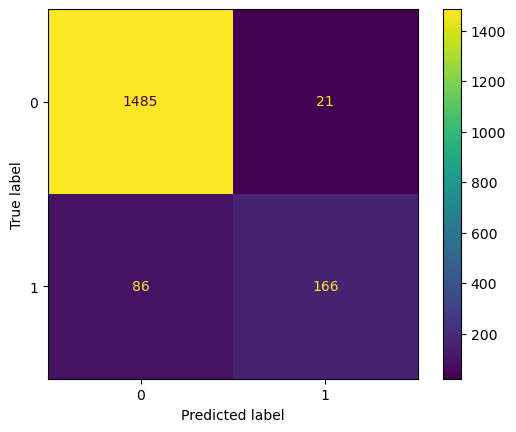

In [269]:
acc_ctboost = accuracy_score(y_test, predict_ctboost)
print('Accuracy =', round(acc_ctboost,3))


roc_ctboost = roc_auc_score(y_test, probas_ctboost[:,1])
print('ROC-AUC =', round(roc_ctboost,3))


f1_ctboost = f1_score(y_test, predict_ctboost, pos_label=1)
print('F1-score =', round(f1_ctboost,3)) 

recall_ctboost = recall_score(y_test, predict_ctboost, pos_label=1)
print('recall =', round(recall_ctboost,3)) 

precision_ctboost = precision_score(y_test, predict_ctboost, pos_label=1)
print('precision =', round(precision_ctboost,3)) 


cm_ctboost = confusion_matrix(y_test, predict_ctboost)
cmp_ctboost = ConfusionMatrixDisplay(cm_ctboost, display_labels=["0", "1"])
cmp_ctboost.plot();

Как видно из матрицы ошибок, модель обладает хорошей точностью -  назвает положительными объекты, действительно являющиеся положительными, однако имеет относительно невысокую полноту, т.к.  треть положительных объектов она определила как отрицательные, что плохо для нашей задачи, т.к. нам выгодно определить макисмально количество склонных к расторжению Договора клиентов.

Выведем график соотношения точности и полноты:

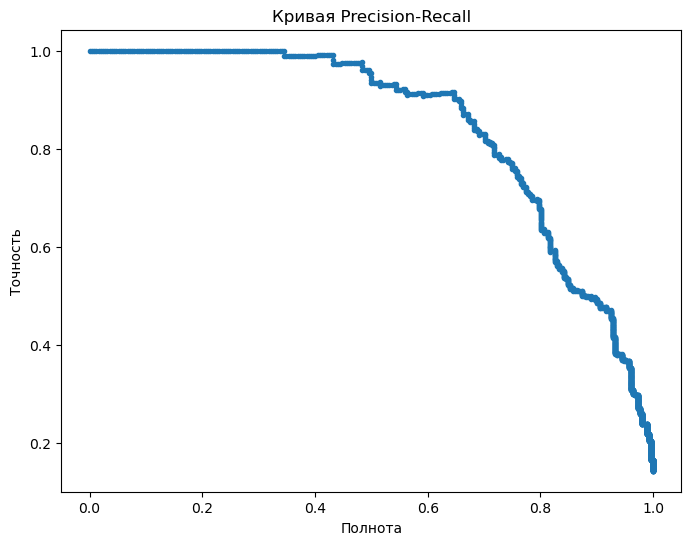

In [272]:
# Вычислим Precision-Recall кривую
precision_ctboost, recall_ctboost, _ = precision_recall_curve(y_test, probas_ctboost[:,1])

# Построим кривую Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall_ctboost, precision_ctboost, marker='.')
plt.title('Кривая Precision-Recall')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.show()

Как видно из графика, точность модели начинает резко падать с увеличением полноты более 0.65

Сформируем датафрейм состоящий из наименования обработанного кодировщиком признаков и значения важности признака, полученного по результатам работы лучшей модели

Применим лучшую модель, полученную по итогам работы пайплайна на кросс-валидации:

In [276]:
best_model = grid_ctboost.best_estimator_

preprocessor = best_model.named_steps['preprocessor']

preprocessor.fit(X_train)
ohe = preprocessor.transformers_[0][1].named_steps['ohe']

ohe_columns = ohe.get_feature_names_out(cat_columns)


column_names = list(ohe_columns) + list(num_columns)

In [277]:
best_model = grid_ctboost.best_estimator_.named_steps['models']  

importances = best_model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': column_names,
    'Importance': importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

Выведем полученный датафрейм:

In [279]:
importance_df

,Feature,Importance
22,ContractDuration,65.742147
1,Type_Two year,4.389265
20,MultipleLines_Yes,3.240695
10,Partner_Yes,2.951547
0,Type_One year,2.823410
6,InternetService_Fiber optic,2.238002
14,OnlineBackup_Yes,2.213700
5,PaymentMethod_Mailed check,2.193547
12,OnlineSecurity_Yes,2.086309
21,ChangePackage_1,2.025040


Визуализируем значения датафрейма с помощью графика barplot:

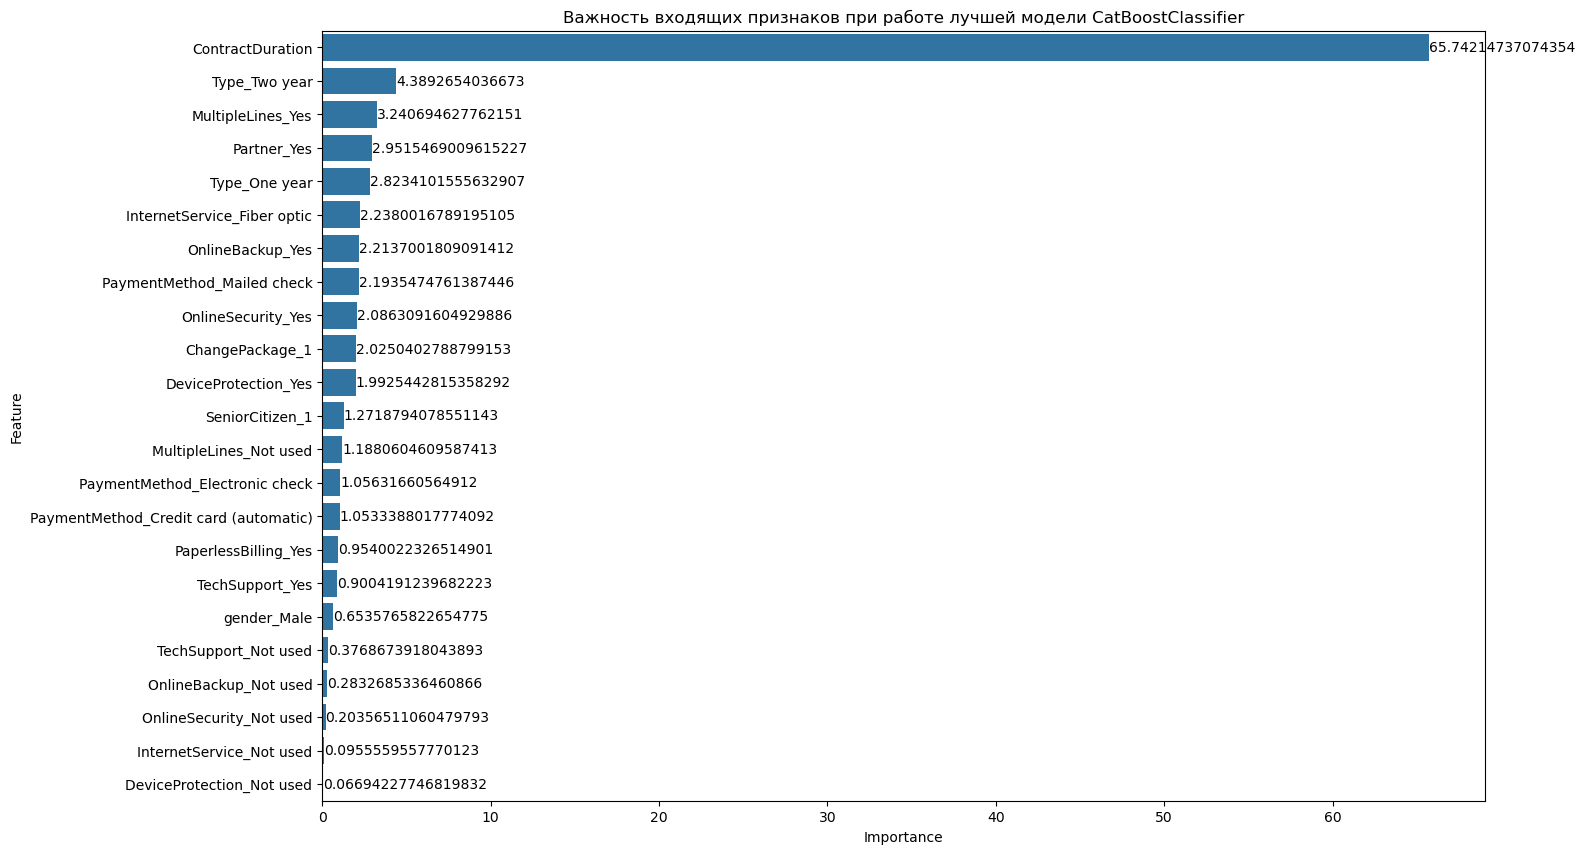

In [281]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = importance_df, x = 'Importance', y ='Feature')
abs_values = importance_df['Importance'].values
ax.bar_label(container=ax.containers[0], labels=abs_values);
ax.set_title('Важность входящих признаков при работе лучшей модели CatBoostClassifier');

Как видно из датафрейма и графика выше, топ-5 наиболее важных признаков в результате работы модели оказались:
1. Длительность контракта 'ContractDuration'
2. Тип контракта 'Two_years'
3. Подключение телефона к нескольким линиям одновременно 'MultipleLines'
4. Наличие супруга у абонента 'Partner'
5. Тип контракта 'One_year'

Выведем графики зависимости наиболее важного признака и целевого признака.  

Длительность контракта 'ContractDuration'

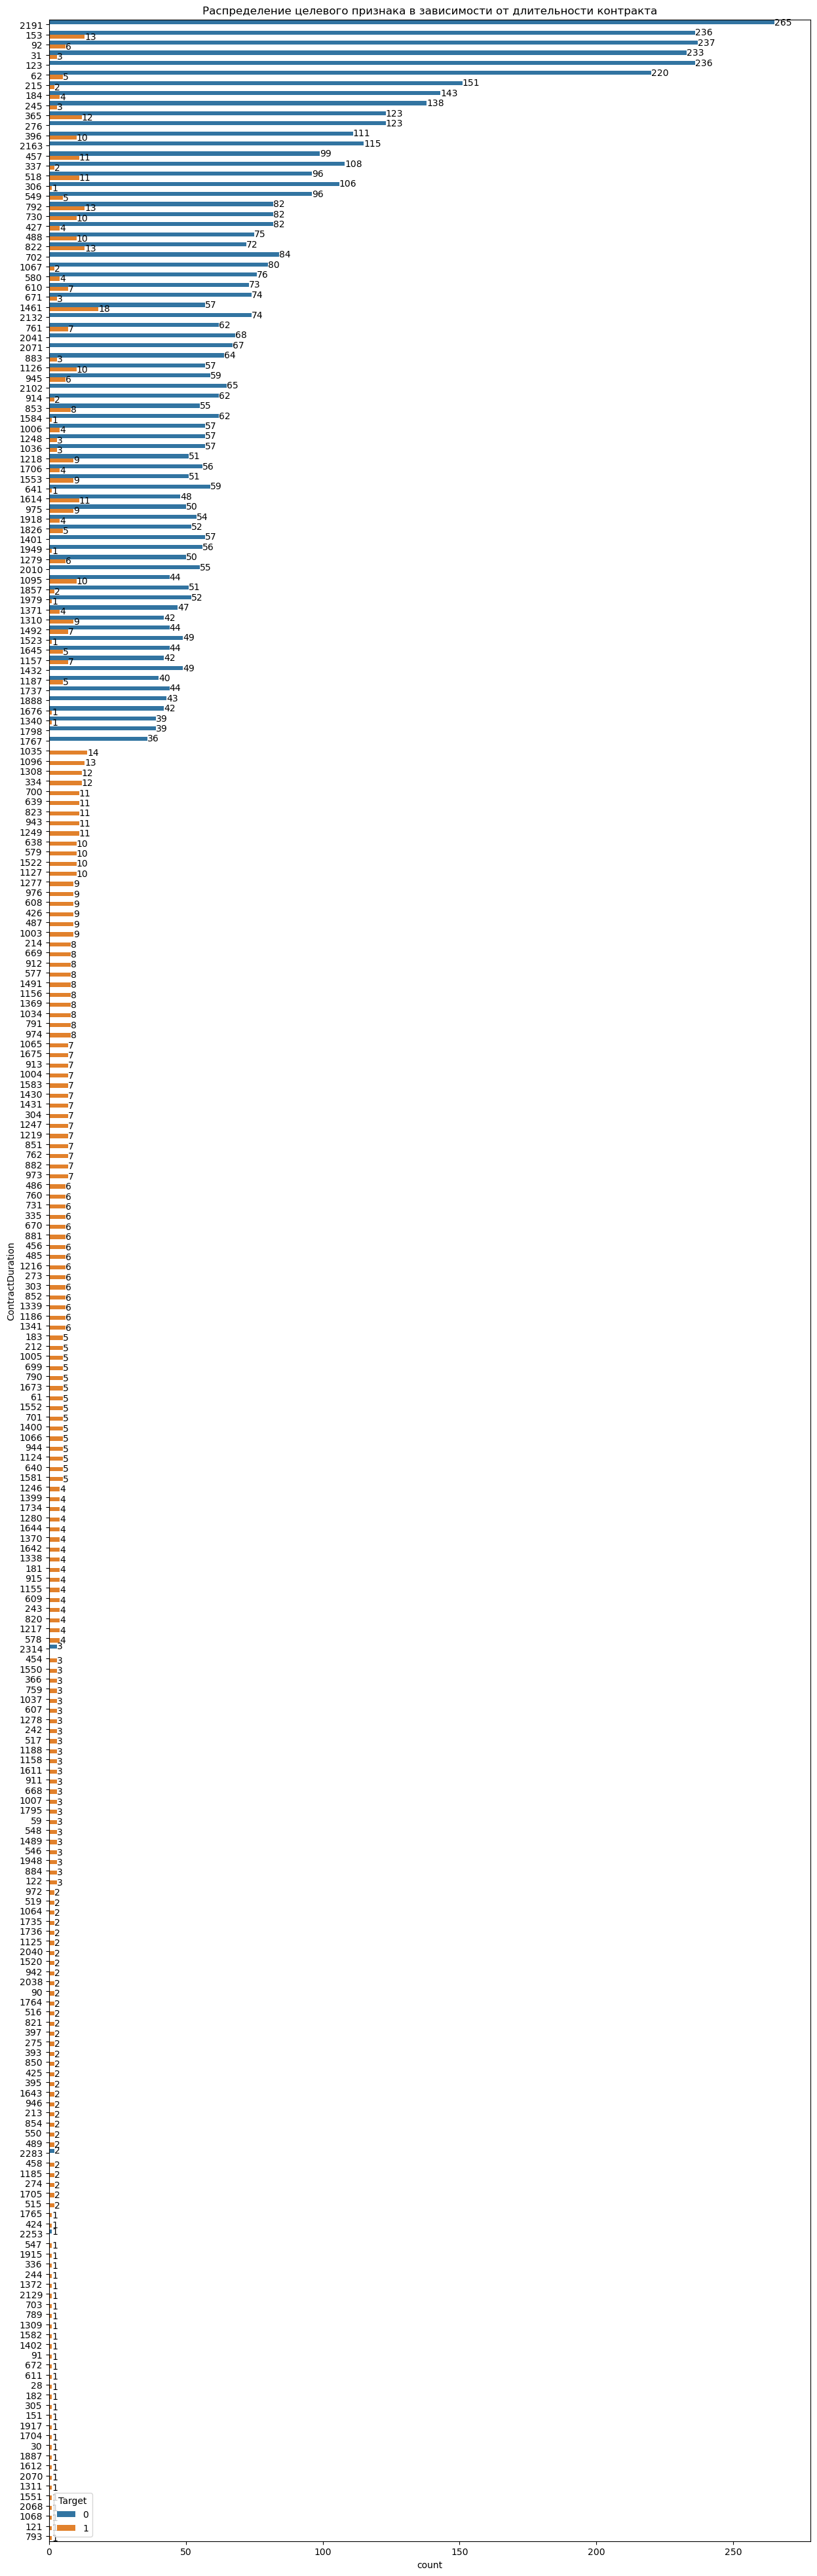

In [285]:
fig, ax = plt.subplots(figsize=(15, 50))

ax = sns.countplot(
    y=df['ContractDuration'], 
    hue=df['Target'], 
    order=df['ContractDuration'].value_counts(ascending=False).index
)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

ax.set_title('Распределение целевого признака в зависимости от длительности контракта');

Как видно из графика выше, имеются объекты с определенной длительностью контрактов, которые чаще отказывались от услуг Заказчика, нежели другие. Предлагается проверить в какие конкретно даты были расторгнуты контракты с такими длительностями и проанализировать что могло послужить причиной такого решение (изменение стоимости, изменение пакета услуг, общение с каким то определенным менеджером и т.д.)

**Вывод:** По результатам данного раздела:
- проведено тестирование модели, показавшей наилучший результата на кросс-валидации, а именно CatBoostClassifier()
- выведены основные метрики и матрица ошибок модели на тестовой выборке:    
Accuracy = 0.939  
ROC-AUC = 0.948  
F1-score = 0.756  
recall = 0.659  
precision = 0.888   

- определены Топ-5 наиболее важных признаков в результате работы модели оказались:
1. Длительность контракта 'ContractDuration'
2. Тип контракта 'Two_years'
3. Подключение телефона к нескольким линиям одновременно 'MultipleLines'
4. Наличие супруга у абонента 'Partner'
5. Тип контракта 'One_year'

На основании описанного выше, для снижения количества клиентов расторгающих контракт с Заказчиком, можно рекомендовать изучить в какие конкретно даты были расторгнуты контракты с длительностями, показавшими большое количество расторжений, выяснить причины которые могли повлиять на решение клиента и устранить факторы, которые могли привести к такому решению клиента. Также можно рекомендовать Заказчику заключать Договора с оплатой помесячно, улучшить качество многоканальной телефонии, а также разработать акции для клиентов, состоящих в браке.
<a id='section_id5'></a>

## Общий вывод

Целью данного исследования являлось обучение на предоставленных Заказчиком данных модели для прогноза оттока клиентов.

В рамках данного исследования:
- выполнено подключение к базе данных с исходными данными Заказчика
- выполнен тестовый запрос на подключение и вывод необходимой информации
- загружены необходимые для исследования датасеты;
- датасеты проверены на корректность вывода;
- датасет проверен на наличие пропусков в данных (выявленные пропуски удалены);
- данные проверены на наличие явных дубликатов (не выявлены);
- значения имеющие некорректный тип данных приведены к типу, наиболее подходящему, для проведения исследования;
- проведен исследовательский анализ в части распределений входных признаков
- исходные датафреймы объединены в итоговый датасет с учётом особенностей услуг телекоммуникации;
- объединенный датасет исследован на пропуски и явные дубликатыю Выявленные пропуски обработаны, дубликаты не выявлены
- сформирован целевой признак;
- сформированы дополнительные входные признаки
- проведен исследовательский анализ, в том числе в разрезе распределения признаков по таргету
- проведен корреляционный анализ, по итогу скорректирован состав обучающего датасета

Для поиска лучшей модели и метрики для поиска клиентов склонных к расторжению Договора с Заказчиком, обучены и провалидированы следующие модели с использованием пайплайна:
- в качестве кодировщиков использовалcя OheHotEncoder 
- в качестве скейлеров использовались StandaradScaler, MinMaxScaler, RobustScaler.
- в качестве моделей МО применялись
а) RandomForestClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'max_features'.
б) LGBMClassifier() с перебором гиперпараметров 'class_weight', 'n_estimators' и 'learning_rate'.
в) CatBoostClassifier() с перебором гиперпараметров 'depth', 'loss_function', 'learning_rate'.
г) NeuralNet() 
- в качестве метрики, с помощью которой будет оценивалось качество модели, использовали ROC-AUC
- метрика рассчитавалась на кросс-валидации с количеством фолдов - 5.

По итогу лучшие показатели показала модель CatBoostClassifier() с гиперпараметрами 'max_depth' = 5, 'loss_function' = 'LogLoss' и 'learning_rate' = 0.05.

Лучшая метрика ROC-AUC полученная на кросс-валидационной выборке равно 0.934041

- проведено тестирование модели, показавшей наилучший результата на кросс-валидации, а именно CatBoostClassifier()
- выведены основные метрики и матрица ошибок модели на тестовой выборке:    
Accuracy = 0.939  
ROC-AUC = 0.948  
F1-score = 0.756  
recall = 0.659  
precision = 0.888  

- определены Топ-5 наиболее важных признаков в результате работы модели оказались:
1. Длительность контракта 'ContractDuration'
2. Тип контракта 'Two_years'
3. Подключение телефона к нескольким линиям одновременно 'MultipleLines'
4. Наличие супруга у абонента 'Partner'
5. Тип контракта 'One_year'

На основании описанного выше, для снижения количества клиентов расторгающих контракт с Заказчиком, можно рекомендовать изучить в какие конкретно даты были расторгнуты контракты с длительностями, показавшими большое количество расторжений, выяснить причины которые могли повлиять на решение клиента и устранить факторы, которые могли привести к такому решению клиента. Также можно рекомендовать Заказчику заключать Договора с оплатой помесячно, улучшить качество многоканальной телефонии, а также разработать акции для клиентов, состоящих в браке.